## Groupe 2 : DEVEAUX Jérôme,NIANG Cheikh Ahmadou Bamba,PHAN Dinh Triem et VO Thanh Tin.


In [1]:
#install.packages('missForest') # Installer sous google colaboratory
#install.packages('corrplot') # Installer sous google colaboratory
#install.packages('partykit') # Installer sous google colaboratory
#install.packages('ROCR') # Installer sous google colaboratory

library(corrplot)
library(lattice)
library(partykit)
library(rpart)
library(ROCR)
library(randomForest)
library(missForest)

Warning message:
"package 'corrplot' was built under R version 3.5.2"
corrplot 0.84 loaded

Warning message:
"package 'partykit' was built under R version 3.5.3"
Loading required package: grid

Loading required package: libcoin

Warning message:
"package 'libcoin' was built under R version 3.5.3"
Loading required package: mvtnorm

Warning message:
"package 'mvtnorm' was built under R version 3.5.3"
Warning message:
"package 'rpart' was built under R version 3.5.3"
Warning message:
"package 'ROCR' was built under R version 3.5.3"
Loading required package: gplots

Warning message:
"package 'gplots' was built under R version 3.5.3"

Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess


Warning message:
"package 'randomForest' was built under R version 3.5.3"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Warning message:
"package 'missForest' was built under R version 3.5.3"
Loading required package: foreach

Warning m

# Partie A : Data preparation & Descriptive statistics

##  A.1 Data preparation

Nous récupérons les données du TitanicTrain en stockant dans la variable $Titanic1$.


In [2]:
Titanic1 <- read.csv('titanicTrain.csv')

### A.1.1 Etude des variables

Avant de commencer à manipuler les données, nous commençons d'abord à visualiser les données. Cela nous permet de savoir quelle type de variable nous manipulons et lesquelles ne seraient pas pertinentes pour la suite.

In [3]:
str(Titanic1)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


Nous avons 12 variables et 891 observations.

Les significations des 12 variables sont : \\
PassengerId : le numéro d'identification d'un passager. \\
Survived : indiqué si le passager est vivant ou mort. \\
Pclass : la classe (1er, 2ème et 3ème). \\
Name : le nom du passager. \\
Sex : indiqué si le passager est une femme ou un homme. \\
Age : l'âge du passager. \\
SibSp : le nombre de frères et sœurs ;ou conjoints à bord. \\
Parch : le nombre de parents ou d'enfants à bord. \\
Ticket : l'identifiant du ticket. \\
Fare : le prix du ticket du passager. \\
Cabin : l'identifiant de la cabine. \\
Embarked : indiqué le port d'embarquement (C = Cherbourg, Q = Queenstown et S = Southampton) des passagers. \\

Les types des 12 variables sont :  \\
2 Variables quantitatives continues : Fare, Age. \\
3 Variables quantitatives discretes : PassengerId, SibSp ,Parch. \\
7 Variables qualitatives nominales : Survived, Pclass, Name, Sex, Ticket, Cabin, Embarked. \\

Summary permet d'avoir un résumé de l'ensemble des variables. Il permet d'avoir les quantiles, la quantités par modalités, les valeurs manquantes par variables.

In [4]:
summary(Titanic1)

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

Les nombres de valeurs manquantes par variables sont : \\
Age : 177. \\
cabin : 687. \\
embarked : 2. \\

Les variables que nous pouvons enlever sont : \\
Cabin : plus de 70% de valeurs manquantes. \\
PassengerID : pas pertinent. \\
Name : pas pertinent ici mais il pourrait donner le rang social. \\
Ticket : Pas pertinent ici mais il pourrait nous dire qui a commandé en même temps. \\



### A.1.2 Variables qualitatives


Nous constatons que le summary considére que les variables Survived et Pclass comme des variables quantitatives alors qu'elles sont qualitatives. 

La commande as.factor() permet d'indiquer qu'une variable est qualitative et celle levels() permet de nommer les modalités.

In [5]:
Titanic1$Survived <- as.factor(Titanic1$Survived)
levels(Titanic1$Survived)
levels(Titanic1$Survived) <- c("dead", "alive")
Titanic1$Pclass <- as.factor(Titanic1$Pclass)
levels(Titanic1$Pclass)
levels(Titanic1$Pclass) <- paste("class", 1:3) #" concaténation"
xti=Titanic1 # variable intermédiaire pour la partie C

[1] "0" "1"

[1] "1" "2" "3"

### A.1.3 Données triées

Nous récupérons seulement les variables pertinentes pour la suite du projet en les stockant dans $Titanic2$

Nous avons 8 variables pertinentes qui sont : \\
2 Variables quantitatives continues : Fare, Age. \\
2 Variables quantitatives discretes : SibSp ,Parch. \\
4 Variables qualitatives nominales : Survived, Pclass, Sex, Embarked. \\

In [6]:
Titanic2 = Titanic1[c(2,3,5:8,10,12)]
str(Titanic2)
summary(Titanic2)

'data.frame':	891 obs. of  8 variables:
 $ Survived: Factor w/ 2 levels "dead","alive": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "class 1","class 2",..: 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


  Survived       Pclass        Sex           Age            SibSp      
 dead :549   class 1:216   female:314   Min.   : 0.42   Min.   :0.000  
 alive:342   class 2:184   male  :577   1st Qu.:20.12   1st Qu.:0.000  
             class 3:491                Median :28.00   Median :0.000  
                                        Mean   :29.70   Mean   :0.523  
                                        3rd Qu.:38.00   3rd Qu.:1.000  
                                        Max.   :80.00   Max.   :8.000  
                                        NA's   :177                    
     Parch             Fare        Embarked
 Min.   :0.0000   Min.   :  0.00    :  2   
 1st Qu.:0.0000   1st Qu.:  7.91   C:168   
 Median :0.0000   Median : 14.45   Q: 77   
 Mean   :0.3816   Mean   : 32.20   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.00           
 Max.   :6.0000   Max.   :512.33           
                                           

## A.2 Descriptive statistics

L'étude descritptive en statistique est très importante. Il nous permet de donner un sens aux données. 

Dans la première partie, nous allons faire une descriptive unidimensionnelle en examinant les variables qualitatives et celles quantitatives séparément. 

Dans la deuxième partie, nous allons faire une descriptive bidimensionnelle permenttent de visualiser les interactions entre les différents types de variables (qualitative, quantitative et qualitative-quantitative).

### A.2.1 Description unidimensionnelle

#### A.2.1.1 Variables qualitatives

Nous avons 4 Variables qualitatives nominales qui sont : Survived, Pclass, Sex, Embarked.



In [7]:
Survived = table(Titanic2$Survived)
Survived
Pclass = table(Titanic2$Pclass)
Pclass
Sex = table(Titanic2$Sex)
Sex
Embarked = table(Titanic2$Embarked)
Embarked


 dead alive 
  549   342 


class 1 class 2 class 3 
    216     184     491 


female   male 
   314    577 


      C   Q   S 
  2 168  77 644 

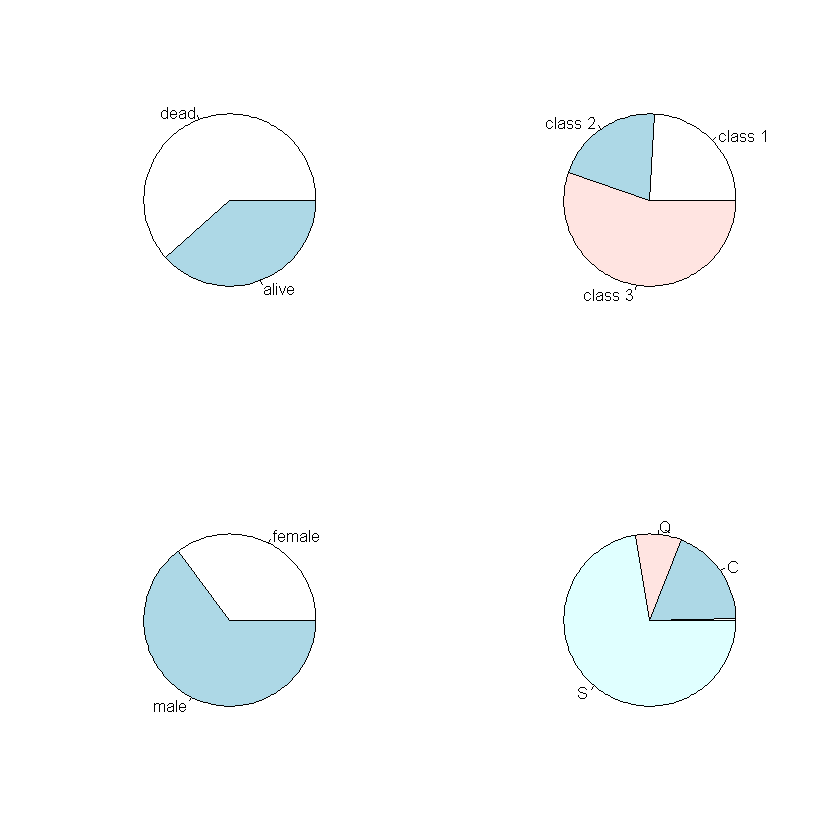

In [8]:
par(mfrow=c(2,2))
pie(Survived)
pie(Pclass)
pie(Sex)
pie(Embarked)

Nous constatons que : \\
le nombre de mort est plus important que celui de vivant. Cela est logique car le naufrage du Titannic est l'une des plus grandes catastrophes maritimes survenues en temps de paix et la plus grande pour l'époque. \\
le nombre d'homme est plus important que celui de femme. \\
le nombre de classe 3 est plus important que les autres classes. Cela est logique car générémenlement il y a plus de places pour les classes standards. \\
le nombre de passager qui a embarqué dans le port S est plus important que les autres ports car Southampton était le port de départ de trajet du Titanic. \\

#### A.2.1.2 Variables quantitaves

Nous avons 4 variables quantitaves: \\
2 Variables quantitatives continues : Fare, Age. \\
2 Variables quantitatives discrets : SibSp ,Parch. \\

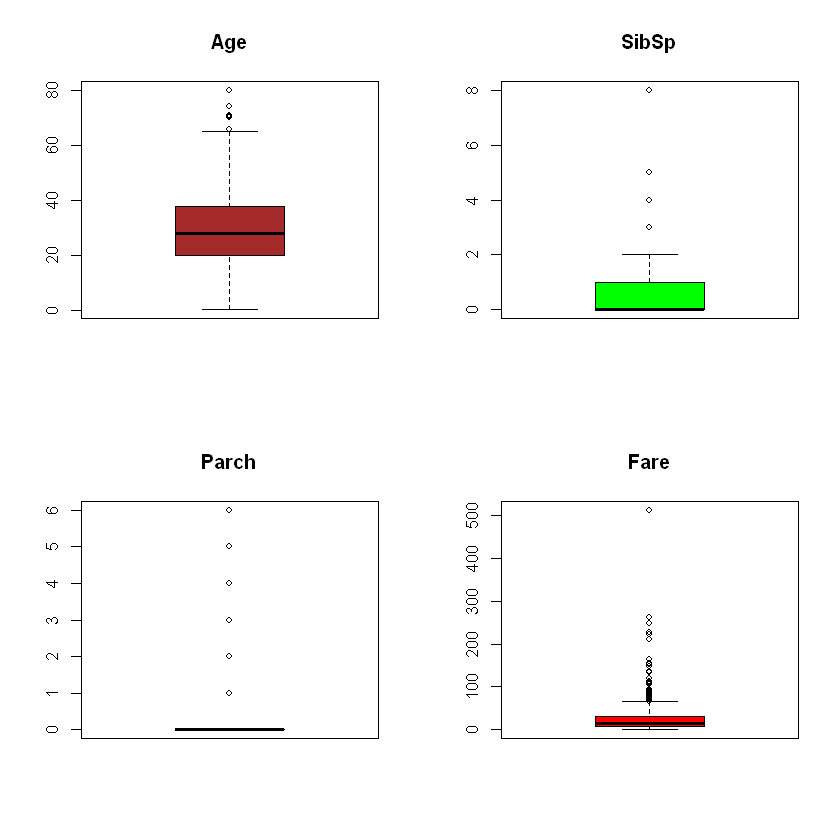

In [9]:
par(mfrow=c(2,2))
boxplot(Titanic2$Age,col="brown",main="Age")
boxplot(Titanic2$SibSp,col="green",main="SibSp")
boxplot(Titanic2$Parch,col="yellow",main="Parch")
boxplot(Titanic2$Fare,col="red",main="Fare")

Nous constatons que : \\
la majorité des passagers a entre 20 et 40 ans. Il y a très peu de valeurs extrèmes ( entre 60 et 80 ans). \\
Le nombre de frères et sœurs ;ou conjoints à bord est généralement de 0 et 1. \\
le nombre de parents ou d'enfants à bord est généralement à 0. \\
le nombre des tickets à prix bas est plus élévé que ceux à prix haut. Cela est logique car nous avons constaté ci-dessus qu'il y a plus de 3ème classe. \\

### A.2.2 Description bidimensionnelle

Nous nous intéressons quelle variables influencent le plus sur la survie du passager.

#### A.2.2.1 Interaction entre variables qualitatives

Nous avons 4 Variables qualitatives nominales qui sont : Survived, Pclass, Sex, Embarked.


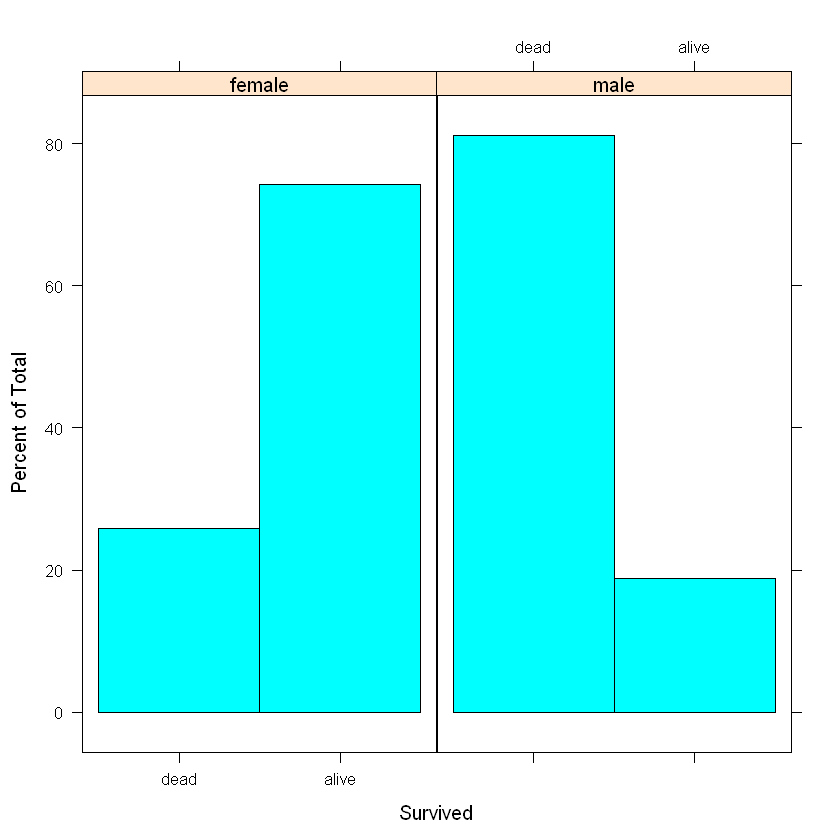

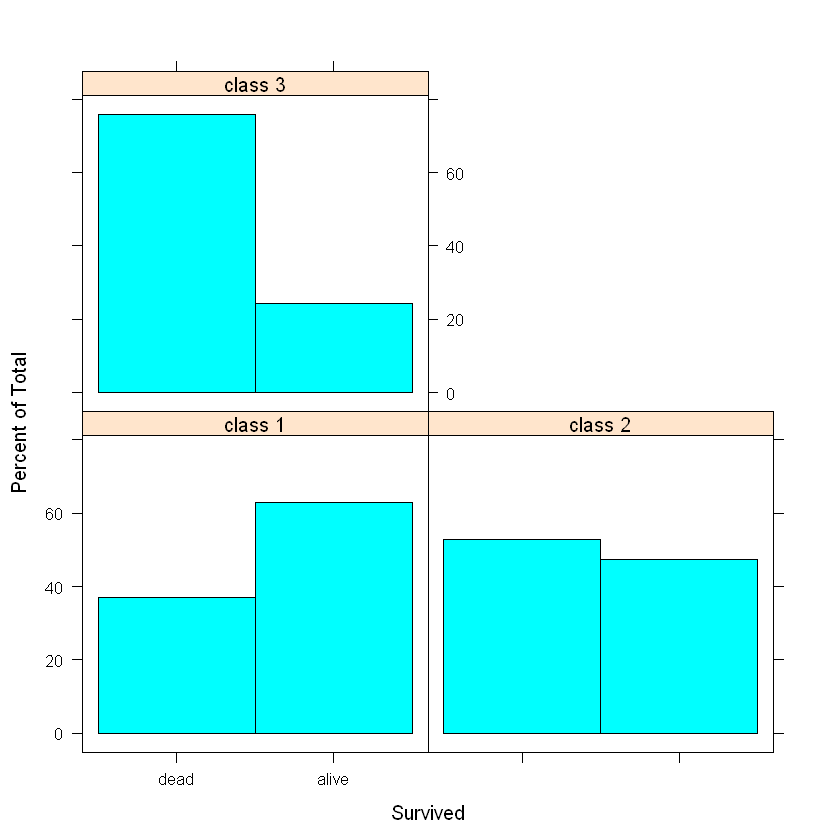

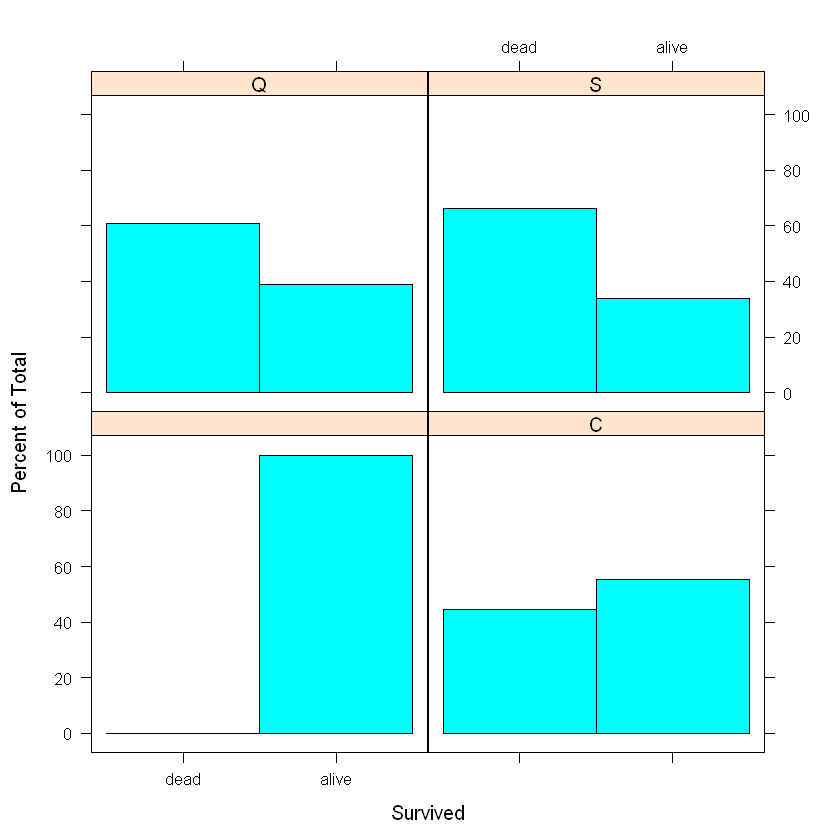

In [10]:
histogram(~Survived | Sex , data = Titanic2)
histogram(~Survived | Pclass , data = Titanic2)
histogram(~Survived | Embarked, data = Titanic2)

Nous constatons que : \\
Les femmes ont plus de chance de survie que les hommes car la société privilégie toujours la survie des femmes et des enfants en priorité. \\
La troisième classe a moins de chance de survie comme elle est généralement situé en bas des navires. Par conséquent, elle doit parcourir plus de distance donc elle prend beaucoup plus de temps pour arriver au canaux de sauvetages. \\
Il n'y a pas d'influcence du port d'embarquement sur la survie d'un passage. Cependant, il y a une quatrième modalité qui apparaît, cette modalité est les deux valeurs manquantes. \\





#### A.2.2.2  Interaction entre variables quantitatives et qualitatives

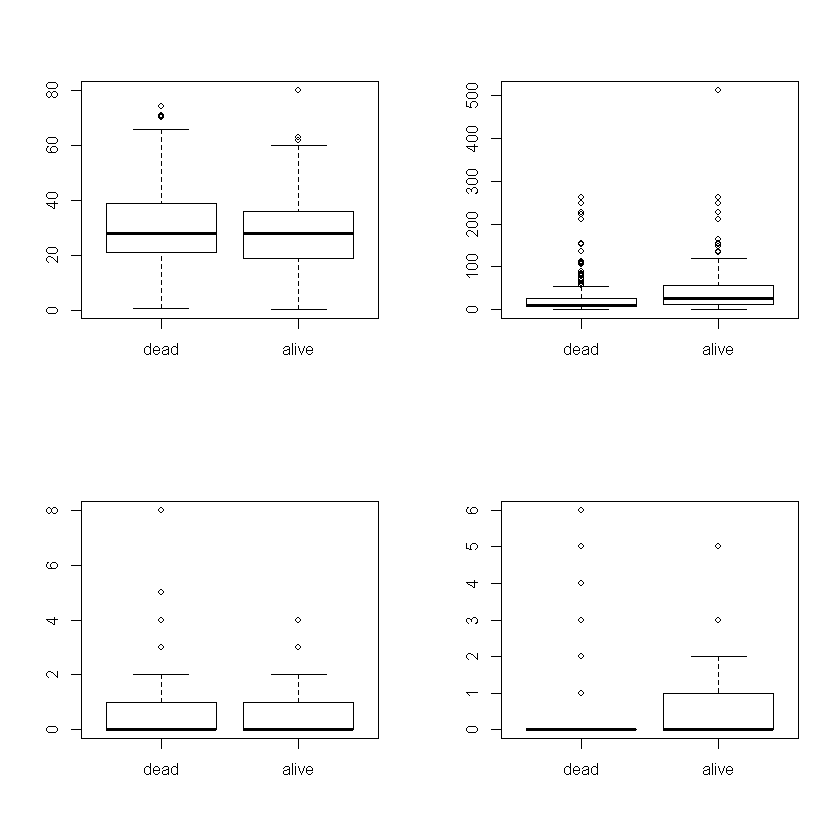

In [11]:
par(mfrow=c(2,2))
boxplot(Age~Survived, data = Titanic2) # ou boxplot(Titanic2$Age~Titanic2$Survived)
boxplot(Fare~Survived, data = Titanic2)
boxplot(SibSp~Survived, data = Titanic2)
boxplot(Parch~Survived, data = Titanic2)

Nous constatons : 
les passagers qui ont pris des tickets à prix haut ont plus de chance de survie,cela est cohérent car les tickts à prix haut correspondent au passagers de 1er et 2ème classses. \\
l'age et le nombre de frères et sœurs ;ou conjoints à bord n'ont pas d'influence sur la survie d'un passager. \\
le nombre de parents ou d'enfants à bord augment les chances de survie car les enfants et les parents sont peut être évacués en premier. \\


### A.2.3 Description multidimensionnelle

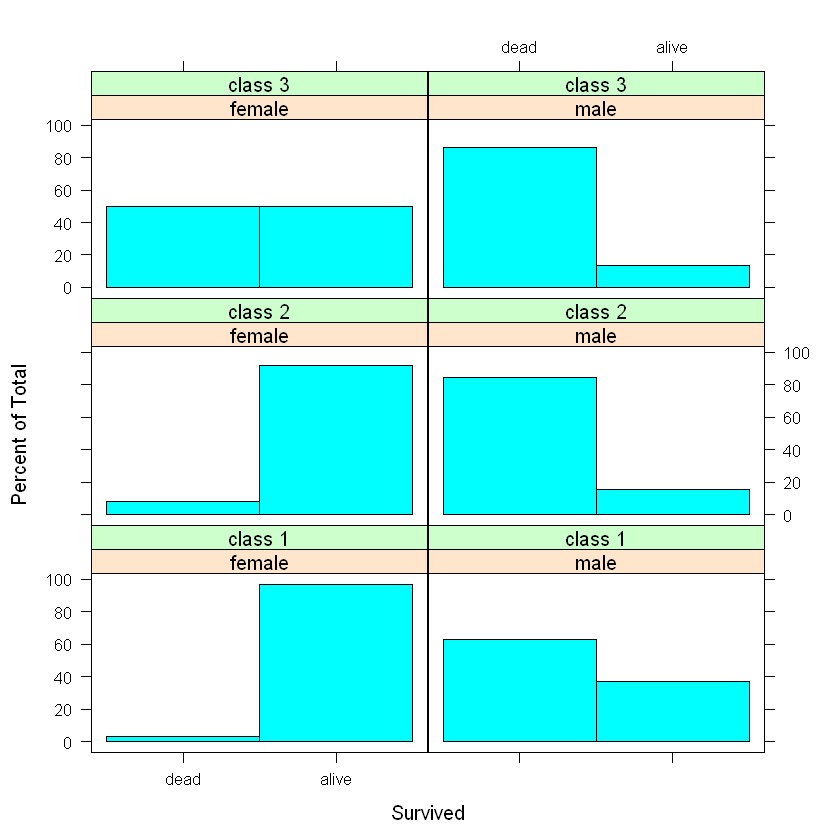

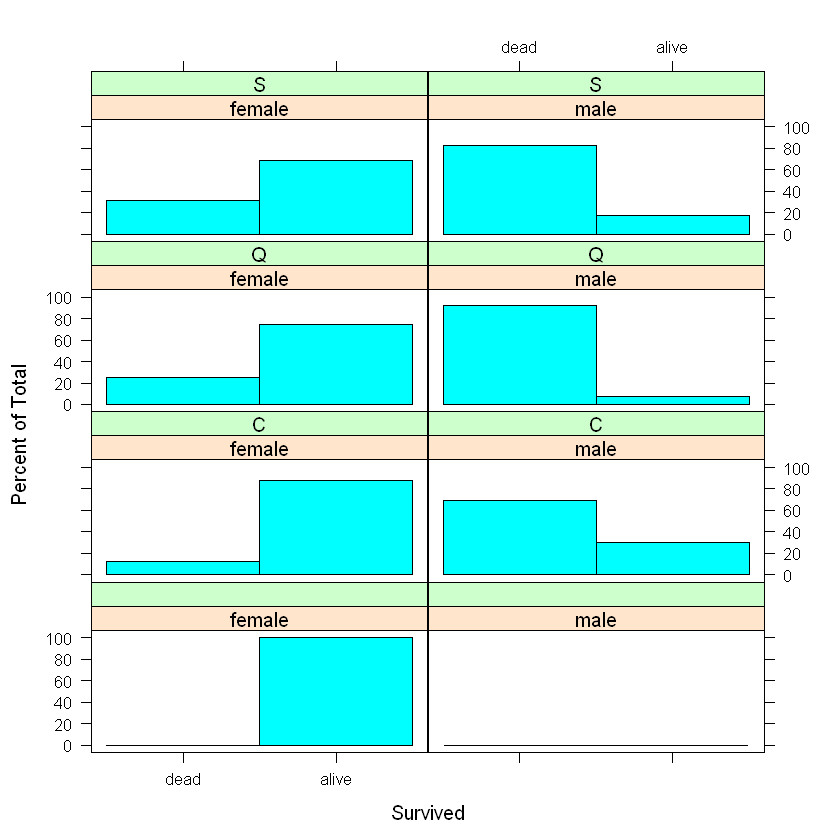

In [12]:
histogram(~Survived | Sex + Pclass, data = Titanic2)
histogram(~Survived | Sex + Embarked , data = Titanic2)

Tout d'abord nous constatons que selon la classe des passengers il n'y a pas de changement de comportement. En effet, que l'on soit dans la classe 1, 2 ou 3, les femmes ont toujours beaucoup de chances de survie que les hommes. Même si nous avons vu précédemment qu'il y a des interactions entre la survie et la classe et entre la survie et le sex, nous pouvons dire qu'il n'y a pas de dépendance entre l'effet du sexe sur la survie et la classe de l'individu. 

Il en est de même pour le second histogramme. Nous pouvons constater, à l'instar du graphe précédent, qu'il n'y a pas de dépendance entre l'effet du sexe sur la survie et le port d'embarquement. 

## Conclusion

Au final, notre jeu de donnée $Titanic2$ contient 8 variables.
A priori, les personnes qui avaient le plus de chance de survie sur le Titanic étaient les femmes ayant des enfants de la première classe.

# Partie B : Sans la variable Age

Avant de commencer, nous enlèvons les deux individus qui n'ont pas de valeur pour la variable "Embarked". \\
On définit aussi les données d'apprentisage dans la variable $train$ et les donnée de test dans la variable $test$. \\

In [13]:
x=Titanic1
manquant=which(x$Embarked=="")
print(manquant)
x=x[-(manquant),]
x$Embarked=as.numeric(x$Embarked)
x$Embarked=as.factor(x$Embarked)
levels(x$Embarked) <- c("C", "Q","S")

summary(x)
set.seed(0)
n <- nrow(x) 
trainIndices <- sample(n, size = 2 * n / 3)
train <- x[trainIndices, ]
test <- x[-trainIndices, ]

[1]  62 830


  PassengerId   Survived       Pclass   
 Min.   :  1   dead :549   class 1:214  
 1st Qu.:224   alive:340   class 2:184  
 Median :446               class 3:491  
 Mean   :446                            
 3rd Qu.:668                            
 Max.   :891                            
                                        
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:312   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.00  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.64  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :883                NA's   :177    
     SibSp            Parch             Ticket         Fare        
 Min.   :0.0

## B.1 Régression logistique

Dans cette partie, nous avons enlevé les variables PassengerId, Name, Ticket, Cabin, Age pour que les raisons que nous avons lu dans la Partie A. 


### B.1.1 Sans interaction

D'abord, on considère un modèle simple qui est le modèle régression logistique sans interaction. Par la méthode "descendant", on obtient le modèle log.lm.step. 

In [14]:
donnee_sans_age_train=train[,c(-1,-4,-6,-9,-11)]
donnee_test=test[,c(-1,-4,-6,-9,-11)]
levels(donnee_test$Survived) <- c("FALSE", "TRUE")
# estimation du modèle complet
log.lm=glm(Survived~.,data=donnee_sans_age_train,family=binomial)
# significativité des paramètres

In [15]:
summary(train)

  PassengerId     Survived       Pclass   
 Min.   :  1.0   dead :364   class 1:145  
 1st Qu.:220.8   alive:228   class 2:120  
 Median :439.5               class 3:327  
 Mean   :443.9                            
 3rd Qu.:663.2                            
 Max.   :891.0                            
                                          
                                             Name         Sex     
 Abbott, Mr. Rossmore Edward                   :  1   female:219  
 Abelson, Mr. Samuel                           :  1   male  :373  
 Adams, Mr. John                               :  1               
 Ahlin, Mrs. Johan (Johanna Persdotter Larsson):  1               
 Aks, Mrs. Sam (Leah Rosen)                    :  1               
 Albimona, Mr. Nassef Cassem                   :  1               
 (Other)                                       :586               
      Age            SibSp            Parch            Ticket   
 Min.   : 0.42   Min.   :0.0000   Min.   :0.0000   3101

In [16]:
log.lm.step=step(log.lm,direction="backward")

Start:  AIC=558.66
Survived ~ Pclass + Sex + SibSp + Parch + Fare + Embarked

           Df Deviance    AIC
- Embarked  2   541.16 555.16
- Fare      1   541.07 557.07
- Parch     1   541.92 557.92
<none>          540.66 558.66
- SibSp     1   544.34 560.34
- Pclass    2   568.38 582.38
- Sex       1   705.50 721.50

Step:  AIC=555.16
Survived ~ Pclass + Sex + SibSp + Parch + Fare

         Df Deviance    AIC
- Fare    1   541.64 553.64
- Parch   1   542.48 554.48
<none>        541.16 555.16
- SibSp   1   545.25 557.25
- Pclass  2   570.32 580.32
- Sex     1   711.45 723.45

Step:  AIC=553.64
Survived ~ Pclass + Sex + SibSp + Parch

         Df Deviance    AIC
- Parch   1   542.64 552.64
<none>        541.64 553.64
- SibSp   1   545.35 555.35
- Pclass  2   600.29 608.29
- Sex     1   715.40 725.40

Step:  AIC=552.64
Survived ~ Pclass + Sex + SibSp

         Df Deviance    AIC
<none>        542.64 552.64
- SibSp   1   548.38 556.38
- Pclass  2   601.38 607.38
- Sex     1   718.83 726.83

In [17]:
summary(log.lm.step)


Call:
glm(formula = Survived ~ Pclass + Sex + SibSp, family = binomial, 
    data = donnee_sans_age_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2584  -0.7211  -0.4645   0.6300   2.5816  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)     2.4688     0.2829   8.728  < 2e-16 ***
Pclassclass 2  -0.9525     0.3050  -3.123  0.00179 ** 
Pclassclass 3  -1.9104     0.2647  -7.217 5.32e-13 ***
Sexmale        -2.7306     0.2324 -11.747  < 2e-16 ***
SibSp          -0.2809     0.1252  -2.244  0.02481 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 789.16  on 591  degrees of freedom
Residual deviance: 542.64  on 587  degrees of freedom
AIC: 552.64

Number of Fisher Scoring iterations: 5


Dans le modèle log.lm.step, nous trouvons que seulement les variables "Pclass", "Sex", "Sibsp" et "Embarked" ont une impacte sur la variable "Survived". Les variables "Pclass" et "sex" jouent un rôle très important. C'est cohérent avec la partie descriptive.

Pour la variable "Pclass":

Pour les individus qui ont les mêmes valeurs des variables "Sex", "SibSp" et "Embarked", si ils sont dans la 2ème class, la chance de "survived" est de $exp(-0.5962) \approx 0.55$. Cela veut dire que la 2ème classe a deux fois moins de chance de survie que la 1er Classe. 

Pour les individus qui ont les mêmes valeurs des variables "Sex", "SibSp" et "Embarked", si ils sont dans la class 3, la chance de "survived" est de $exp(-1.6659) \approx 0.19$. Cela veut dire que la 3ème classe ont 5 fois moins de chance de survie que la 1er Classe. 

En conclusion, nous constatons bien que la 1er classe ont beaucoup plus de chance de survie que les autres classes. 

Pour la variable "Sex":

Pour les individus qui ont les mêmes valeurs des variables "Pclass", "SibSp" et "Embarkesd", si ils sont des hommes, la chance de "Survived" est de $exp(-2.5546) \approx 0.078$. Cela veut dire que les hommes ont 13 fois moins de la chance de survie que des femmes. 
 
Pour les varibles "SibSp": 

Nous choissons deux individus tels que la valeur de "SibSp" diffère 1, l'individu ayant plus de frère et soeurs a moins de chance de "survived" ($exp(-0.2291) \approx 0.8$ ). 

Pour la variable "Embarked" : 

Les individus embarquent en classe C ont la chance "survived" 1.4 (repestivement 2.3) fois plus élevé que ceux en classe Q( repestivement S). 
    



In [18]:
# matrice de confusion de l'échantillon de test et erreur apparente
pred.log=predict(log.lm.step,newdata=donnee_test,type="response")
tab1 <- table(pred.log>0.5, donnee_test[,"Survived"])
tab1

       
        FALSE TRUE
  FALSE   169   44
  TRUE     16   68

Nous constatons que le taux de vrai négatifs est d'environ 87% et le taux de vrai positifs est moins élevé, environ 71%. 

Autrement-dit, on prédit un peu mal pour les individus "Survived". 

In [19]:
sum(tab1[1,2],tab1[2,1])/sum(tab1) 

[1] 0.2020202

Le taux d'erreur est d'environ 20%. 


### B.1.2 Avec interaction

In [20]:
# régression avec le modèle minimum
log.qm=glm(Survived~1,data=donnee_sans_age_train,family=binomial)
# algorithme stepwise en précisant le plus grand modèle possible
log.qm.step1=step(log.qm,direction="both",
  scope=list(lower=~1,upper=~(Pclass + Sex + SibSp + Fare + Embarked + Parch)^2), family=binomial)

Start:  AIC=791.16
Survived ~ 1

           Df Deviance    AIC
+ Sex       1   609.46 613.46
+ Pclass    2   718.90 724.90
+ Fare      1   742.09 746.09
+ Embarked  2   778.72 784.72
+ Parch     1   786.99 790.99
<none>          789.16 791.16
+ SibSp     1   788.61 792.61

Step:  AIC=613.46
Survived ~ Sex

           Df Deviance    AIC
+ Pclass    2   548.38 556.38
+ Fare      1   588.97 594.97
+ SibSp     1   601.38 607.38
+ Embarked  2   601.26 609.26
+ Parch     1   605.39 611.39
<none>          609.46 613.46
- Sex       1   789.16 791.16

Step:  AIC=556.38
Survived ~ Sex + Pclass

             Df Deviance    AIC
+ Pclass:Sex  2   529.94 541.94
+ SibSp       1   542.64 552.64
+ Parch       1   545.35 555.35
<none>            548.38 556.38
+ Fare        1   548.31 558.31
+ Embarked    2   547.16 559.16
- Pclass      2   609.46 613.46
- Sex         1   718.90 724.90

Step:  AIC=541.94
Survived ~ Sex + Pclass + Sex:Pclass

             Df Deviance    AIC
+ SibSp       1   524.83 538.83

In [21]:
summary(log.qm.step1)


Call:
glm(formula = Survived ~ Sex + Pclass + SibSp + Sex:Pclass + 
    Sex:SibSp, family = binomial, data = donnee_sans_age_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7736  -0.5773  -0.5441   0.4121   2.1123  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)             3.8247     0.7358   5.198 2.01e-07 ***
Sexmale                -4.3968     0.7756  -5.669 1.44e-08 ***
Pclassclass 2          -1.4015     0.8628  -1.624  0.10430    
Pclassclass 3          -3.5126     0.7482  -4.695 2.67e-06 ***
SibSp                  -0.4550     0.1876  -2.426  0.01528 *  
Sexmale:Pclassclass 2   0.2661     0.9534   0.279  0.78017    
Sexmale:Pclassclass 3   2.2494     0.8099   2.777  0.00548 ** 
Sexmale:SibSp           0.3846     0.2444   1.573  0.11563    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 789.16  on 591  degrees of

Nous trouvons les mêmes interpretations pour les variables "Sex" et "Pclass". Dans ce modèle, il y a des effets interactions entre les variables "Sex" et "Pclass"; "sex" et "Embarked"; et "Pclass" et "Sibsp".

Nous trouvons que pour les hommes en 2ème classe 2 ont 3 fois moins de chances de "survived" que ceux en 1er classe ($exp(1.3224-0.198) \approx 3$). 

Il ya les mêmes résultats pour les hommes en 3 ème classe.




In [22]:
pred.log=predict(log.qm.step1,newdata=donnee_test,type="response")

tab2 <- table(pred.log>0.5,donnee_test[,"Survived"])
tab2

       
        FALSE TRUE
  FALSE   173   49
  TRUE     12   63

Nous constatons que le taux de vrai négatifs est d'environ 96% et le taux de vrai positifs est moins élevé, d'environ 60%. 
Autrement-dit, on prédit mal pour les individus "survived"( plus mal dans le cas sans interaction). 

In [23]:
sum(tab2[1,2],tab2[2,1])/sum(tab2) 

[1] 0.2053872

Le taux d'erreur est d'environ 18%, plus élevé que celui dans le cas sans interaction.

## B.2 Arbre et forêt aléatoire


### B.2.1 Arbre binaire



On utilise l'arbre binaire pour modéliser le problème. On cherche d'abord la valeur cpmin telle que on obtient la plus petite erreur.

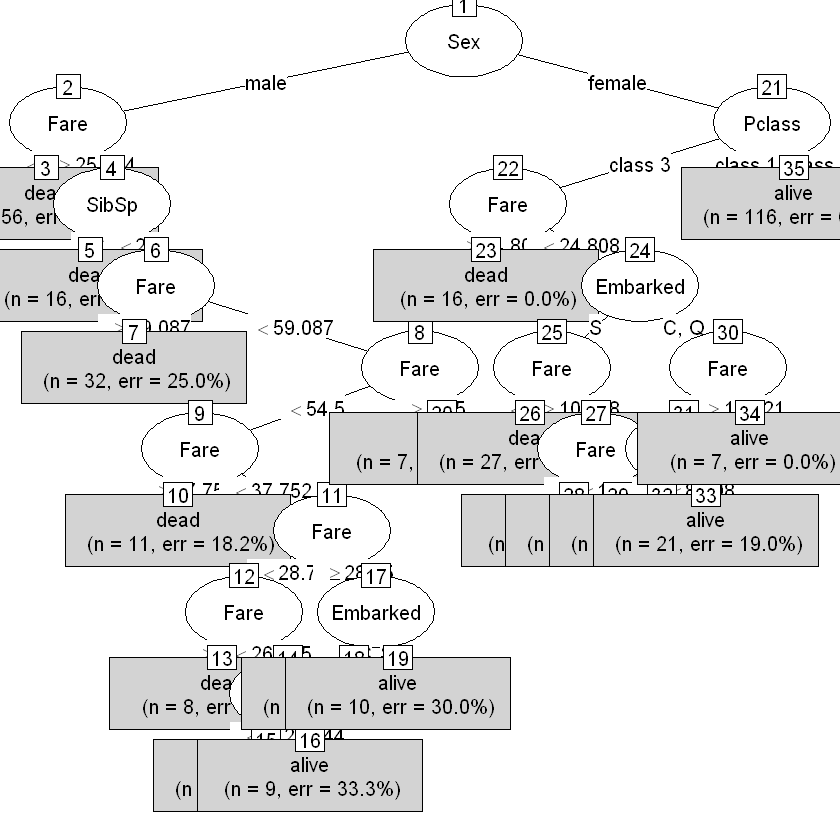

In [24]:
tree.dis=rpart(Survived~.,data=donnee_sans_age_train,parms=list(split="information"),cp=0.001)
plot(as.party(tree.dis), type="simple")

In [25]:
xmat = xpred.rpart(tree.dis)
levels(donnee_sans_age_train$Survived) <- c("FALSE", "TRUE")
#xmat
xerr=donnee_sans_age_train$Survived!= (xmat>1.5) 
#donnee_sans_age[,"Survived"]
CVerr=apply(xerr, 2, sum)/nrow(xerr)
CVerr
as.numeric(attributes(which.min(CVerr))$names)

0.721491228 0.124672547 0.019614631 0.009807316 0.006934819 0.004903658 
  0.3851351   0.2145270   0.1925676   0.2043919   0.2043919   0.2128378 
0.002094270 
  0.2010135

[1] 0.01961463

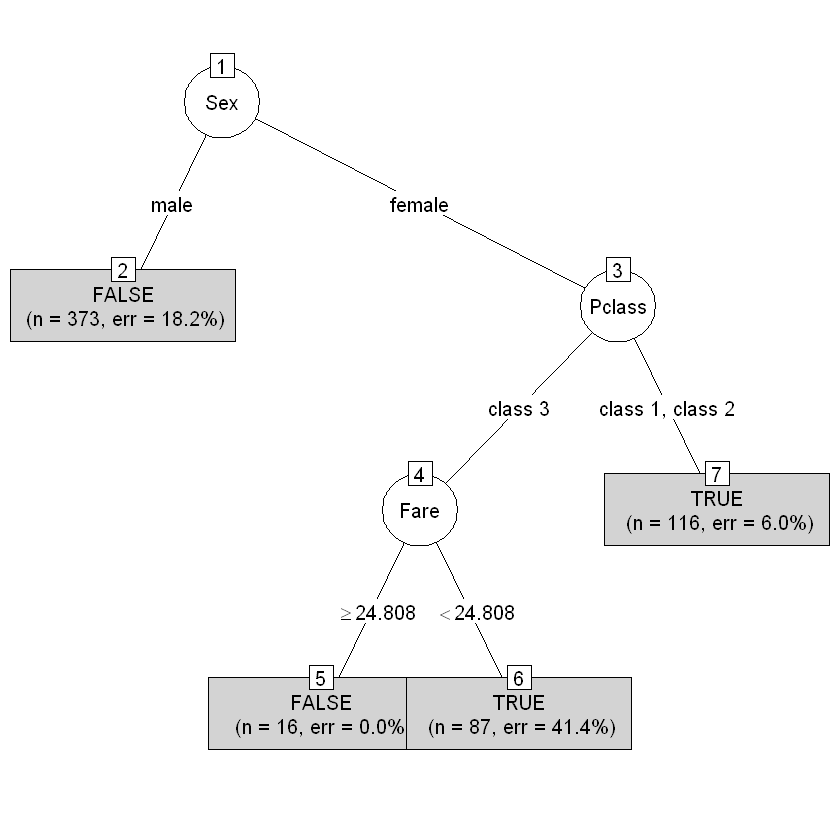

In [26]:
tree.dis=rpart(Survived~.,data=donnee_sans_age_train,parms=list(split="information"),
               cp=as.numeric(attributes(which.min(CVerr))$names))
plot(as.party(tree.dis), type="simple")

On trouve que dans cette arbre, toutes les variables ont des effets sur la variable "survived", spécialement les variables "Sex", "Fare", et "Pclass".

 Grâce à cette arbre, on voit que les femmes en classe 1 et 2 ont la probabilité de "survived" très élevé.   

In [27]:
donnee_test=test[,c(-1,-4,-6,-9,-11)]
levels(donnee_test$Survived) <- c("FALSE", "TRUE")

summary(donnee_test)

  Survived       Pclass        Sex          SibSp            Parch       
 FALSE:185   class 1: 69   female: 93   Min.   :0.0000   Min.   :0.0000  
 TRUE :112   class 2: 64   male  :204   1st Qu.:0.0000   1st Qu.:0.0000  
             class 3:164                Median :0.0000   Median :0.0000  
                                        Mean   :0.5455   Mean   :0.4108  
                                        3rd Qu.:1.0000   3rd Qu.:1.0000  
                                        Max.   :8.0000   Max.   :5.0000  
      Fare         Embarked
 Min.   :  0.000   C: 54   
 1st Qu.:  7.896   Q: 22   
 Median : 14.108   S:221   
 Mean   : 29.439           
 3rd Qu.: 30.500           
 Max.   :512.329           

In [28]:
pred.tree=predict(tree.dis,newdata=donnee_test,type="class") 
#levels(pred.tree)
#levels(pred.tree) <- c("dead", "alive")
t=table(pred.tree,donnee_test[,"Survived"])
t

         
pred.tree FALSE TRUE
    FALSE   168   43
    TRUE     17   69

On voit que le taux de vrai négatifs  est d'environ 92%, le taux de vrai positifs est moins élevé, d'environ 65.5%. 

Autrement-dit, on prédit mal pour les individus "survived". 

In [29]:
erreur=(t[1,2]+t[2,1])/sum(t)
erreur

[1] 0.2020202

On voit que le taux d'erreur d'arbre de décision est plus éleve que celui de régression logistique avec interaction, et moins élevé que celui de régression logistique sans interaction. 

### B.2.2 Forêt aléatoire

Maintenant, on utilise le forêt aléatoire pour mieux prédire

In [30]:
set.seed(111)
levels(donnee_sans_age_train$Survived) <- c("FALSE", "TRUE")

library(randomForest)
rf.dis=randomForest(Survived~., data=donnee_sans_age_train,xtest=donnee_test[,-1],ytest=donnee_test[,"Survived"],
   ntree=10000,do.trace=1000,importance=TRUE,mtry=) 

ntree      OOB      1      2|    Test      1      2
 1000:  19.09%  9.89% 33.77%|  20.88%  9.19% 40.18%
 2000:  18.75%  9.62% 33.33%|  20.88%  8.65% 41.07%
 3000:  18.75%  9.34% 33.77%|  21.21%  9.19% 41.07%
 4000:  18.41%  9.07% 33.33%|  21.21%  9.19% 41.07%
 5000:  18.58%  9.34% 33.33%|  21.21%  9.19% 41.07%
 6000:  18.58%  9.34% 33.33%|  21.21%  9.19% 41.07%
 7000:  18.58%  9.34% 33.33%|  21.21%  9.19% 41.07%
 8000:  18.41%  9.07% 33.33%|  20.88%  8.65% 41.07%
 9000:  18.41%  9.07% 33.33%|  20.88%  8.65% 41.07%
10000:  18.41%  9.07% 33.33%|  20.88%  8.65% 41.07%


In [31]:
pred.rfq=rf.dis$test$predicted
t=table(pred.rfq,donnee_test[,"Survived"])
t
erreur=(t[1,2]+t[2,1])/sum(t)
erreur

        
pred.rfq FALSE TRUE
   FALSE   169   46
   TRUE     16   66

[1] 0.2087542

On voit que le taux de vrai négatifs  est d'environ 92.6% et le taux de vrai positifs est moins élevé, d'environ 66.4%. 
Autrement-dit, on prédit mal pour les individus "Survived".
Le forêt aléatoire prédit mieux que les autres modèles par rapport au taux d'erreur. 

#### B.2.2.1 Importance des variables


Critère Gini:

In [32]:
sort(round(importance(rf.dis), 2)[,4], decreasing=TRUE)

Sex     Fare   Pclass    Parch    SibSp Embarked 
   70.09    49.06    23.28    12.77    10.86     8.35

Critère Entropie:

In [33]:
sort(round(importance(rf.dis), 2)[,3], decreasing=TRUE)

Sex     Fare   Pclass    Parch    SibSp Embarked 
  342.21   153.29   147.97   105.50    71.89    65.35

On voit que avec 2 critères Entropie et Gini, les variables "Sex", "Pclass", "Fare" sont toujour les plus importants.
Il y a une petite différence de l'importance des variables par rapport 2 critères: pour la critère Gini, la variable "faire" est plus importante que la variable "Pclass" contrairement à la critère Entropie

On voit que la variable Fare est très importante pour expliquer "survived" dans la forêt aléatoire, c'est cohérent avec le cas l'arbre binaire mais totalement différent dans le cas de régression logistique( la variable "fare" n'a aucune l'impact sur la variable "Survived"). Les autres variables comme "sex" et "Pclass" sont importantes pour tous les modèles. 

##### B.2.2.2 Courbe ROCR

On étudie maintenant la courbe ROCR pour les 4 modèles: régression logistique sans interaction, avec interaction, l'arbre binaire et la forêt aléatoire.

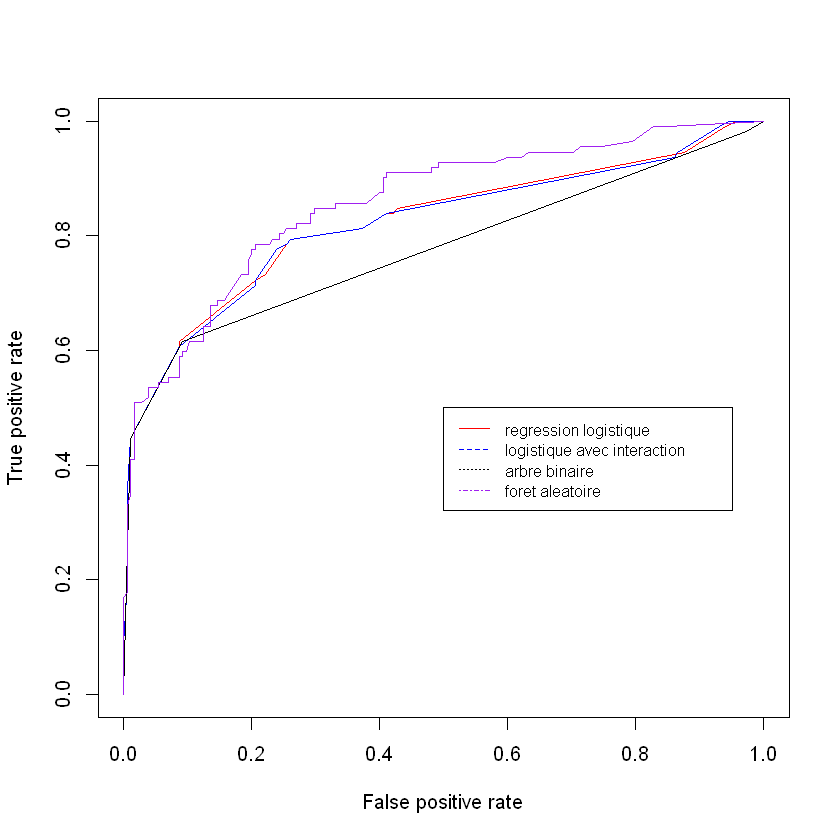

In [34]:
roclogit=predict(log.lm.step,newdata=donnee_test,type="response")
predlogit=prediction(roclogit,donnee_test[,"Survived"])
perflogit=performance(predlogit, "tpr","fpr")
plot(perflogit,col="red")   # AJOUTER UNE LEGENDE 

roclogit1=predict(log.qm.step1,newdata=donnee_test,type="response")
predlogit1=prediction(roclogit1,donnee_test[,"Survived"])
perflogit1=performance(predlogit1, "tpr","fpr")
plot(perflogit1,col="blue",add=TRUE)

ROCdistree=predict(tree.dis,newdata=donnee_test,type="prob")[,2]
preddistree=prediction(ROCdistree,donnee_test$Survived)
perfdistree=performance(preddistree,"tpr","fpr")
plot(perfdistree,col="black",add=TRUE)  

#rocrfr=predict(rf.dis,newdata=donnee_test,type="prob")
predrfr=prediction(rf.dis$test$votes[,2],donnee_test$Survived)
perfrfr=performance(predrfr,"tpr","fpr")
plot(perfrfr,col="purple",add=TRUE)  
legend( 0.5,0.5,,legend=c("regression logistique ", "logistique avec interaction","arbre binaire","foret aleatoire"),
       col=c("red", "blue","black","purple"),lty=1:4, cex=0.8)

On voit que il n'y a pas de courbe qui est meilleure que les autres. C'est compréhensible parce que le taux d'erreur de chaque modèle n'est pas très différent. 

Toutefois, dans la zone ou le taux de vrais positifs > 0.8, les modèles non linéaires(l'arbre binaire et la forêt aléatoire) sont meilleurs que les autres. Le modèle logistique n'est pas aussi bon que les autres modèles.Ce résultat est en adéquation avec ce que nous avons vu précédemment.

### Conclusion
Dan le cas qu'on ne considère pas la variables "Age", 4 méthodes: la régression logistique, la régression logistique avec interaction, l'arbre binaire, la forêt aléatoire nous donnent une bonne résultat(le taux d'erreur est inférieur à 0.2).
Toutes 4 méthodes prévoient bien les individus qui sont morts mais un peu mal pour les individus vivants.
Les modèles non linéaires sont un peu meilleurs que les autres modèles.
Généralement, les variables "Pclass", "Fare" et spécialement "Sex" joue un rôle très important pour la variable "Survived":
Des femmes ont plus de chances de survie que les hommes.
On peut améliorer nos modèles grâce à la variable "Age". 

# Partie C

In [35]:
manquant=which(xti$Embarked=="")
TitData=xti[-manquant,]

Si nous observons notre jeu de données, nous constatons que pour la variable Embarked il y a 2 individus pour lesquels les valeurs de cette variable ne sont pas indiquées.Nous avons effectuer des tests en les gardant. Nous avons finalement décidé de les enlever du jeu de données car elles posent problème lors de la régression logistique ( le modèle n'arrive pas à déterminer les valeurs de certains coefficients lors de la régression avec interactions).  Et étant donné leur nombre très négligeable face à la taille du jeu de données, nous les enlèvons. 

In [36]:
summary(TitData)

  PassengerId   Survived       Pclass   
 Min.   :  1   dead :549   class 1:214  
 1st Qu.:224   alive:340   class 2:184  
 Median :446               class 3:491  
 Mean   :446                            
 3rd Qu.:668                            
 Max.   :891                            
                                        
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:312   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.00  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.64  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :883                NA's   :177    
     SibSp            Parch             Ticket         Fare        
 Min.   :0.0

Comme nous l'avons vu dans la partie, il y a des variables comme ticket, Cabin, name et passengerId qui ne semblent pas avoir d'influences sur la survie des passagers. Nous avons enlever afin de ne pas poser de problème lors de l'imputation. En fait, certaines de ces variables quantitatives présentent beaucoup de modalités, ce qui peut poser problème.

In [37]:
Tit=TitData[,c(-1,-4,-9,-11)]
levels(Tit$Survived)<-c("FALSE","TRUE")

In [38]:
TitDataImp <- missForest(Tit, xtrue=Tit)

  missForest iteration 1 in progress...done!
  missForest iteration 2 in progress...done!
  missForest iteration 3 in progress...done!
  missForest iteration 4 in progress...done!


In [39]:
summary(TitDataImp$ximp)

  Survived       Pclass        Sex           Age            SibSp       
 FALSE:549   class 1:214   female:312   Min.   : 0.42   Min.   :0.0000  
 TRUE :340   class 2:184   male  :577   1st Qu.:21.00   1st Qu.:0.0000  
             class 3:491                Median :28.78   Median :0.0000  
                                        Mean   :29.53   Mean   :0.5242  
                                        3rd Qu.:36.15   3rd Qu.:1.0000  
                                        Max.   :80.00   Max.   :8.0000  
     Parch             Fare         Embarked
 Min.   :0.0000   Min.   :  0.000    :  0   
 1st Qu.:0.0000   1st Qu.:  7.896   C:168   
 Median :0.0000   Median : 14.454   Q: 77   
 Mean   :0.3825   Mean   : 32.097   S:644   
 3rd Qu.:0.0000   3rd Qu.: 31.000           
 Max.   :6.0000   Max.   :512.329           

Nous avons fait appel à la fonction missForest afin d'imputer les valeurs manquantes. Observons maintenant les valeurs des erreurs.

In [40]:
TitDataImp$OOBerror
TitDataImp$error
TitDataImputation=TitDataImp$ximp

NRMSE       PFC 
0.1929561 0.0000000

NULL

Nous avons une erreur de l'ordre de 19%. Ce qui semble acceptable. ####


Maintenant que les données sont imputés, nous allons passer à la prédiction avec les arbres aléatoires. Tout d'abord nous devons créer des échantillons test et d'apprentissage.

In [41]:
set.seed(111) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .3   # part de l'échantillon test
npop <- nrow(TitDataImputation) # nombre de lignes dans les données
nvar <- ncol(TitDataImputation) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

In [42]:
# construction de l'échantillon d'apprentissage
datappr <- TitDataImputation[appri, ] 
# construction de l'échantillon test
datestd <- TitDataImputation[testi, ] 
summary(datappr) # vérification
summary(datestd)

  Survived       Pclass        Sex           Age            SibSp       
 FALSE:389   class 1:145   female:217   Min.   : 0.42   Min.   :0.0000  
 TRUE :233   class 2:132   male  :405   1st Qu.:21.00   1st Qu.:0.0000  
             class 3:345                Median :29.00   Median :0.0000  
                                        Mean   :29.94   Mean   :0.5161  
                                        3rd Qu.:37.00   3rd Qu.:1.0000  
                                        Max.   :80.00   Max.   :8.0000  
     Parch             Fare         Embarked
 Min.   :0.0000   Min.   :  0.000    :  0   
 1st Qu.:0.0000   1st Qu.:  7.925   C:110   
 Median :0.0000   Median : 14.200   Q: 60   
 Mean   :0.3666   Mean   : 31.282   S:452   
 3rd Qu.:0.0000   3rd Qu.: 29.125           
 Max.   :5.0000   Max.   :512.329           

  Survived       Pclass        Sex           Age            SibSp       
 FALSE:160   class 1: 69   female: 95   Min.   : 0.75   Min.   :0.0000  
 TRUE :107   class 2: 52   male  :172   1st Qu.:21.00   1st Qu.:0.0000  
             class 3:146                Median :28.46   Median :0.0000  
                                        Mean   :28.58   Mean   :0.5431  
                                        3rd Qu.:35.00   3rd Qu.:1.0000  
                                        Max.   :71.00   Max.   :8.0000  
     Parch             Fare         Embarked
 Min.   :0.0000   Min.   :  0.000    :  0   
 1st Qu.:0.0000   1st Qu.:  7.896   C: 58   
 Median :0.0000   Median : 15.500   Q: 17   
 Mean   :0.4195   Mean   : 33.994   S:192   
 3rd Qu.:1.0000   3rd Qu.: 39.344           
 Max.   :6.0000   Max.   :512.329           

## C. 1 Régression logistique

Dans cette partie, nous allons utiliser la méthode de la régression logistique pour expliquer notre modèle. Tout d'abord commençons par la régression logistique sans interactions entre les variables explicatives. 

### C.1.1 Régression logistique sans interactions

In [43]:
log.lm=glm(Survived~.,data=datappr,family=binomial)
anova(log.lm,test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,621,822.7288,NA
Pclass,2,68.3963243,619,754.3325,1.405811e-15
Sex,1,192.9840867,618,561.3484,7.095702e-44
Age,1,16.9374013,617,544.4110,3.863286e-05
SibSp,1,10.9677738,616,533.4432,9.271007e-04
Parch,1,0.4596331,615,532.9836,4.977955e-01
Fare,1,0.6802161,614,532.3034,4.095123e-01
Embarked,2,0.9443109,612,531.3591,6.236566e-01


In [44]:
# Recherche d'un modèle optimal au sens d'Akaïke
log.lm.step=step(log.lm,direction="backward")

Start:  AIC=551.36
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked

           Df Deviance    AIC
- Embarked  2   532.30 548.30
- Fare      1   531.80 549.80
- Parch     1   531.95 549.95
<none>          531.36 551.36
- SibSp     1   539.03 557.03
- Age       1   553.08 571.08
- Pclass    2   585.25 601.25
- Sex       1   690.87 708.87

Step:  AIC=548.3
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare

         Df Deviance    AIC
- Fare    1   532.98 546.98
- Parch   1   533.01 547.01
<none>        532.30 548.30
- SibSp   1   541.10 555.10
- Age     1   554.23 568.23
- Pclass  2   586.40 598.40
- Sex     1   701.66 715.66

Step:  AIC=546.98
Survived ~ Pclass + Sex + Age + SibSp + Parch

         Df Deviance    AIC
- Parch   1   533.44 545.44
<none>        532.98 546.98
- SibSp   1   541.37 553.37
- Age     1   556.52 568.52
- Pclass  2   622.22 632.22
- Sex     1   704.80 716.80

Step:  AIC=545.44
Survived ~ Pclass + Sex + Age + SibSp

         Df Deviance    AIC
<n

In [45]:
t=table(log.lm.step$fitted.values>0.5,datappr[,"Survived"])
print(t)
print("Taux de bien classés:")
Taux_B_Class=1-(t[1,2]+t[2,1])/sum(t)
print(Taux_B_Class*100)
Taux_v_positif=t[2,2]/(t[2,1]+t[2,2])*100
print("Taux de Vrai Positfs")
print(Taux_v_positif)
Taux_Faux_positif=t[2,1]/(t[2,1]+t[1,1])*100
print("Taux de Faux Positfs")
print(Taux_Faux_positif)

       
        FALSE TRUE
  FALSE   340   70
  TRUE     49  163
[1] "Taux de bien classés:"
[1] 80.86817
[1] "Taux de Vrai Positfs"
[1] 76.88679
[1] "Taux de Faux Positfs"
[1] 12.5964


Nous obtenons un taux de bien classés de 81%. Ce résultat est bien. Il nous est demandé d'avoir un modèle avec un taux de bien classés de plus de 80% . 
Nous pouvons aussi constater que le modèle recommendé lors de la recherche du modèle (Survived ~ Pclass + Sex + Age + SibSp) trouve plus facile les personnes qui meurent que ceux que survivent. 

Observons les résultats sur l'échantillon test.  

In [46]:
pred.log=predict(log.lm.step,newdata=datestd,type="response")
Tab <- table(pred.log>0.5, datestd[,"Survived"])
print(Tab)
print("Taux de bien classés:")
Taux_B_Class=1-(Tab[1,2]+Tab[2,1])/sum(Tab)
print(Taux_B_Class*100)
Taux_v_positif=Tab[2,2]/(Tab[2,1]+Tab[2,2])*100
print("Taux de Vrai Positfs")
print(Taux_v_positif)
Taux_Faux_positif=Tab[2,1]/(Tab[2,1]+Tab[1,1])*100
print("Taux de Faux Positfs")
print(Taux_Faux_positif)

       
        FALSE TRUE
  FALSE   136   27
  TRUE     24   80
[1] "Taux de bien classés:"
[1] 80.89888
[1] "Taux de Vrai Positfs"
[1] 76.92308
[1] "Taux de Faux Positfs"
[1] 15


Nous obtenons un taux de bien classés de 81%. C'est relativement un bon résultat.

### C.1.2 Régression avec interactions

Nous essayons par la suite d'améliorer le modèle en ajoutant les interactions. 

In [47]:
log.lm1=glm(Survived~.^2,data=datappr,family=binomial)
anova(log.lm1,test="Chisq")

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,621,822.7288,NA
Pclass,2,68.39632434,619,754.3325,1.405811e-15
Sex,1,192.98408667,618,561.3484,7.095702e-44
Age,1,16.93740127,617,544.4110,3.863286e-05
SibSp,1,10.96777383,616,533.4432,9.271007e-04
Parch,1,0.45963310,615,532.9836,4.977955e-01
Fare,1,0.68021614,614,532.3034,4.095123e-01
Embarked,2,0.94431090,612,531.3591,6.236566e-01
Pclass:Sex,2,22.81259803,610,508.5465,1.112519e-05


In [48]:
# Continuer
log.lm.step1=step(log.lm1,direction="backward")

Start:  AIC=503.73
Survived ~ (Pclass + Sex + Age + SibSp + Parch + Fare + Embarked)^2



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                  Df Deviance    AIC
- Pclass:Embarked  4   417.56 497.56
- Pclass:Age       2   416.05 500.05
- Age:SibSp        1   415.73 501.73
- SibSp:Embarked   2   417.77 501.77
- Parch:Fare       1   415.79 501.79
- Sex:Parch        1   415.83 501.83
- Sex:SibSp        1   415.92 501.92
- Pclass:Parch     2   418.02 502.02
- Sex:Fare         1   416.55 502.55
- SibSp:Parch      1   417.63 503.63
<none>                 415.73 503.73
- Sex:Age          1   418.41 504.41
- SibSp:Fare       1   418.55 504.55
- Age:Fare         1   418.74 504.74
- Fare:Embarked    2   424.18 508.18
- Pclass:Sex       2   425.05 509.05
- Pclass:Fare      2   425.76 509.76
- Age:Parch        1   424.18 510.18
- Sex:Embarked     2   426.76 510.76
- Age:Embarked     2   427.76 511.76
- Pclass:SibSp     2   430.40 514.40
- Parch:Embarked   2   440.77 524.77


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=497.56
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Pclass:Sex + Pclass:Age + Pclass:SibSp + Pclass:Parch + Pclass:Fare + 
    Sex:Age + Sex:SibSp + Sex:Parch + Sex:Fare + Sex:Embarked + 
    Age:SibSp + Age:Parch + Age:Fare + Age:Embarked + SibSp:Parch + 
    SibSp:Fare + SibSp:Embarked + Parch:Fare + Parch:Embarked + 
    Fare:Embarked



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- Pclass:Age      2   417.88 493.88
- SibSp:Embarked  2   419.25 495.25
- Age:SibSp       1   417.59 495.59
- Sex:Parch       1   417.60 495.60
- Sex:SibSp       1   417.67 495.67
- Parch:Fare      1   417.73 495.73
- Pclass:Parch    2   419.99 495.99
- Sex:Fare        1   418.46 496.46
- SibSp:Parch     1   419.27 497.27
<none>                417.56 497.56
- Sex:Age         1   420.33 498.33
- SibSp:Fare      1   420.57 498.57
- Age:Fare        1   421.07 499.07
- Pclass:Sex      2   426.71 502.71
- Pclass:Fare     2   427.19 503.19
- Fare:Embarked   2   427.30 503.30
- Age:Parch       1   426.11 504.11
- Sex:Embarked    2   430.51 506.51
- Pclass:SibSp    2   432.19 508.19
- Age:Embarked    2   432.58 508.58
- Parch:Embarked  2   443.12 519.12


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=493.88
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Pclass:Sex + Pclass:SibSp + Pclass:Parch + Pclass:Fare + 
    Sex:Age + Sex:SibSp + Sex:Parch + Sex:Fare + Sex:Embarked + 
    Age:SibSp + Age:Parch + Age:Fare + Age:Embarked + SibSp:Parch + 
    SibSp:Fare + SibSp:Embarked + Parch:Fare + Parch:Embarked + 
    Fare:Embarked



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- SibSp:Embarked  2   419.56 491.56
- Age:SibSp       1   417.88 491.88
- Sex:Parch       1   417.90 491.90
- Sex:SibSp       1   417.99 491.99
- Parch:Fare      1   418.01 492.01
- Pclass:Parch    2   420.22 492.22
- Sex:Fare        1   418.62 492.62
- SibSp:Parch     1   419.63 493.63
<none>                417.88 493.88
- SibSp:Fare      1   420.87 494.87
- Sex:Age         1   421.06 495.06
- Age:Fare        1   422.56 496.56
- Pclass:Fare     2   427.27 499.27
- Pclass:Sex      2   427.31 499.31
- Fare:Embarked   2   427.57 499.57
- Age:Parch       1   426.37 500.37
- Sex:Embarked    2   430.84 502.84
- Pclass:SibSp    2   432.57 504.57
- Age:Embarked    2   433.09 505.09
- Parch:Embarked  2   443.31 515.31


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=491.56
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Pclass:Sex + Pclass:SibSp + Pclass:Parch + Pclass:Fare + 
    Sex:Age + Sex:SibSp + Sex:Parch + Sex:Fare + Sex:Embarked + 
    Age:SibSp + Age:Parch + Age:Fare + Age:Embarked + SibSp:Parch + 
    SibSp:Fare + Parch:Fare + Parch:Embarked + Fare:Embarked



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- Age:SibSp       1   419.56 489.56
- Parch:Fare      1   419.63 489.63
- Sex:SibSp       1   419.63 489.63
- Sex:Parch       1   419.64 489.64
- Pclass:Parch    2   421.97 489.97
- Sex:Fare        1   420.65 490.65
- SibSp:Parch     1   420.78 490.78
<none>                419.56 491.56
- Sex:Age         1   422.46 492.46
- SibSp:Fare      1   422.53 492.53
- Age:Fare        1   424.68 494.68
- Pclass:Sex      2   429.23 497.23
- Pclass:Fare     2   429.33 497.33
- Age:Parch       1   428.10 498.10
- Sex:Embarked    2   433.18 501.18
- Pclass:SibSp    2   434.13 502.13
- Fare:Embarked   2   442.48 510.48
- Age:Embarked    2   443.55 511.55
- Parch:Embarked  2   444.86 512.86


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=489.56
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Pclass:Sex + Pclass:SibSp + Pclass:Parch + Pclass:Fare + 
    Sex:Age + Sex:SibSp + Sex:Parch + Sex:Fare + Sex:Embarked + 
    Age:Parch + Age:Fare + Age:Embarked + SibSp:Parch + SibSp:Fare + 
    Parch:Fare + Parch:Embarked + Fare:Embarked



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- Parch:Fare      1   419.63 487.63
- Sex:SibSp       1   419.63 487.63
- Sex:Parch       1   419.64 487.64
- Pclass:Parch    2   422.02 488.02
- Sex:Fare        1   420.65 488.65
- SibSp:Parch     1   420.86 488.86
<none>                419.56 489.56
- Sex:Age         1   422.46 490.46
- SibSp:Fare      1   422.54 490.54
- Age:Fare        1   424.71 492.71
- Pclass:Sex      2   429.28 495.28
- Pclass:Fare     2   429.33 495.33
- Age:Parch       1   429.60 497.60
- Sex:Embarked    2   433.19 499.19
- Pclass:SibSp    2   438.63 504.63
- Fare:Embarked   2   442.65 508.65
- Age:Embarked    2   443.75 509.75
- Parch:Embarked  2   445.56 511.56


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=487.63
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Pclass:Sex + Pclass:SibSp + Pclass:Parch + Pclass:Fare + 
    Sex:Age + Sex:SibSp + Sex:Parch + Sex:Fare + Sex:Embarked + 
    Age:Parch + Age:Fare + Age:Embarked + SibSp:Parch + SibSp:Fare + 
    Parch:Embarked + Fare:Embarked



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- Sex:SibSp       1   419.72 485.72
- Sex:Parch       1   419.72 485.72
- Pclass:Parch    2   422.02 486.02
- Sex:Fare        1   420.75 486.75
- SibSp:Parch     1   420.95 486.95
<none>                419.63 487.63
- SibSp:Fare      1   422.55 488.55
- Sex:Age         1   422.58 488.58
- Age:Fare        1   424.72 490.72
- Pclass:Fare     2   429.33 493.33
- Pclass:Sex      2   429.36 493.36
- Age:Parch       1   429.61 495.61
- Sex:Embarked    2   433.27 497.27
- Pclass:SibSp    2   438.76 502.76
- Fare:Embarked   2   442.96 506.96
- Age:Embarked    2   444.12 508.12
- Parch:Embarked  2   445.73 509.73


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=485.72
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Pclass:Sex + Pclass:SibSp + Pclass:Parch + Pclass:Fare + 
    Sex:Age + Sex:Parch + Sex:Fare + Sex:Embarked + Age:Parch + 
    Age:Fare + Age:Embarked + SibSp:Parch + SibSp:Fare + Parch:Embarked + 
    Fare:Embarked



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- Sex:Parch       1   419.75 483.75
- Pclass:Parch    2   422.35 484.35
- Sex:Fare        1   420.92 484.92
- SibSp:Parch     1   421.23 485.23
<none>                419.72 485.72
- Sex:Age         1   422.58 486.58
- SibSp:Fare      1   422.65 486.65
- Age:Fare        1   424.74 488.74
- Pclass:Sex      2   429.44 491.44
- Pclass:Fare     2   429.46 491.46
- Age:Parch       1   429.65 493.65
- Sex:Embarked    2   433.29 495.29
- Pclass:SibSp    2   438.88 500.88
- Fare:Embarked   2   442.99 504.99
- Age:Embarked    2   444.13 506.13
- Parch:Embarked  2   446.12 508.12


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=483.75
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Pclass:Sex + Pclass:SibSp + Pclass:Parch + Pclass:Fare + 
    Sex:Age + Sex:Fare + Sex:Embarked + Age:Parch + Age:Fare + 
    Age:Embarked + SibSp:Parch + SibSp:Fare + Parch:Embarked + 
    Fare:Embarked



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- Pclass:Parch    2   422.68 482.68
- Sex:Fare        1   420.92 482.92
- SibSp:Parch     1   421.24 483.24
<none>                419.75 483.75
- SibSp:Fare      1   422.68 484.68
- Sex:Age         1   422.85 484.85
- Age:Fare        1   424.88 486.88
- Pclass:Fare     2   429.51 489.51
- Pclass:Sex      2   429.51 489.51
- Age:Parch       1   430.18 492.18
- Sex:Embarked    2   433.40 493.40
- Pclass:SibSp    2   438.89 498.89
- Fare:Embarked   2   443.00 503.00
- Age:Embarked    2   444.23 504.23
- Parch:Embarked  2   446.18 506.18


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=482.68
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Pclass:Sex + Pclass:SibSp + Pclass:Fare + Sex:Age + Sex:Fare + 
    Sex:Embarked + Age:Parch + Age:Fare + Age:Embarked + SibSp:Parch + 
    SibSp:Fare + Parch:Embarked + Fare:Embarked



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                 Df Deviance    AIC
- Sex:Fare        1   423.96 481.96
<none>                422.68 482.68
- SibSp:Parch     1   424.99 482.99
- Sex:Age         1   426.02 484.02
- SibSp:Fare      1   426.41 484.41
- Age:Fare        1   428.23 486.23
- Pclass:Fare     2   431.87 487.87
- Pclass:Sex      2   435.56 491.56
- Age:Parch       1   433.83 491.83
- Sex:Embarked    2   436.09 492.09
- Fare:Embarked   2   446.82 502.82
- Pclass:SibSp    2   447.47 503.47
- Age:Embarked    2   447.79 503.79
- Parch:Embarked  2   450.36 506.36


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=481.96
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Pclass:Sex + Pclass:SibSp + Pclass:Fare + Sex:Age + Sex:Embarked + 
    Age:Parch + Age:Fare + Age:Embarked + SibSp:Parch + SibSp:Fare + 
    Parch:Embarked + Fare:Embarked



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                 Df Deviance    AIC
<none>                423.96 481.96
- SibSp:Parch     1   425.99 481.99
- Sex:Age         1   426.52 482.52
- SibSp:Fare      1   426.80 482.80
- Age:Fare        1   429.02 485.02
- Pclass:Fare     2   433.00 487.00
- Age:Parch       1   434.14 490.14
- Sex:Embarked    2   437.25 491.25
- Pclass:Sex      2   440.15 494.15
- Pclass:SibSp    2   447.52 501.52
- Fare:Embarked   2   447.93 501.93
- Age:Embarked    2   448.89 502.89
- Parch:Embarked  2   451.78 505.78


In [49]:
summary(log.lm.step1)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Parch + 
    Fare + Embarked + Pclass:Sex + Pclass:SibSp + Pclass:Fare + 
    Sex:Age + Sex:Embarked + Age:Parch + Age:Fare + Age:Embarked + 
    SibSp:Parch + SibSp:Fare + Parch:Embarked + Fare:Embarked, 
    family = binomial, data = datappr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7831  -0.5386  -0.2941   0.2532   2.6118  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            5.757e+00  1.448e+00   3.975 7.05e-05 ***
Pclassclass 2         -6.053e-01  1.403e+00  -0.431  0.66625    
Pclassclass 3         -4.314e+00  1.107e+00  -3.899 9.68e-05 ***
Sexmale               -2.553e+00  1.268e+00  -2.014  0.04404 *  
Age                   -7.282e-02  3.337e-02  -2.182  0.02910 *  
SibSp                  2.296e+00  8.422e-01   2.726  0.00641 ** 
Parch                  1.446e+00  5.980e-01   2.418  0.01561 *  
Fare                  -2.211e-02  1.057e-02  

In [50]:
t=table(log.lm.step1$fitted.values>0.5,datappr[,"Survived"])
print(t)
print("Taux de bien classés:")
Taux_B_Class=1-(t[1,2]+t[2,1])/sum(t)
print(Taux_B_Class*100)
Taux_v_positif=t[2,2]/(t[2,1]+t[2,2])*100
print("Taux de Vrai Positfs")
print(Taux_v_positif)
Taux_Faux_positif=t[2,1]/(t[2,1]+t[1,1])*100
print("Taux de Faux Positfs")
print(Taux_Faux_positif)

       
        FALSE TRUE
  FALSE   358   62
  TRUE     31  171
[1] "Taux de bien classés:"
[1] 85.04823
[1] "Taux de Vrai Positfs"
[1] 84.65347
[1] "Taux de Faux Positfs"
[1] 7.969152


Nous obtenons un taux de bien classés de 84%/85% . Le résultat est meilleur que celui obtenu précédemment en terme de nombre d'individus bien classés. Mais ce modèle a beaucoup plus de facile à trouver les individus décédés et moins de facilité à trouver les survivants que le modèle précédent. 

Observons les résultats sur l'échantillon Test.

In [51]:
pred.log=predict(log.lm.step1,newdata=datestd,type="response")
Tab <- table(pred.log>0.5, datestd[,"Survived"])
print(Tab)
print("Taux de bien classés:")
Taux_B_Class=1-(Tab[1,2]+Tab[2,1])/sum(Tab)
print(Taux_B_Class*100)
Taux_v_positif=Tab[2,2]/(Tab[2,1]+Tab[2,2])*100
print("Taux de Vrai Positfs")
print(Taux_v_positif)
Taux_Faux_positif=Tab[2,1]/(Tab[2,1]+Tab[1,1])*100
print("Taux de Faux Positfs")
print(Taux_Faux_positif)

       
        FALSE TRUE
  FALSE   138   26
  TRUE     22   81
[1] "Taux de bien classés:"
[1] 82.02247
[1] "Taux de Vrai Positfs"
[1] 78.64078
[1] "Taux de Faux Positfs"
[1] 13.75


Nous obtenons un taux de bien classés de 82% . Le résultat est meilleur que celui obtenu précédemment en terme de nombre d'individus bien classés. De plus, ce modèle arrive à trouver plus facilement les personnes qui survivent que le modèle précédent (81.25% contre 76%).

## C.2 Arbres aléatoires

### C.2.2 Construction des arbres de décisions 

Nous voulons encore amélioré le résultat de la classification. Nous allons donc faire appel aux arbres et aux forêts aléatoires.

Nous allons utiliser une méthode de discrimination pour ensuite faire une prédiction et vérifier la précision de notre modèles.

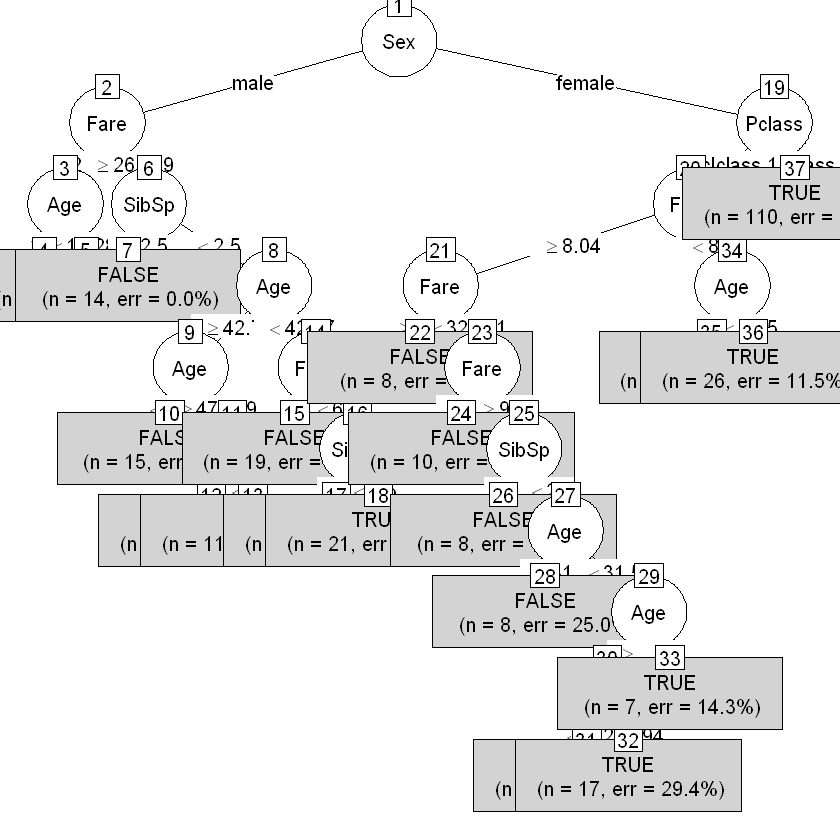

In [52]:
tree.dis <- rpart(Survived ~ ., data = datappr, parms = list(split = "information"), cp = 0.001)
plot(as.party(tree.dis), type="simple")

### Commentaire: 

### Commentaire: 

Nous obtenons un arbre avec 19 feuilles avec une erreur maximale de 40% et toutes les autres erreurs inférieurs à 20%. Compte tenu de ces informations, nous pouvons dire que nous avons un arbre avec un grand nombre de feuilles. Nous constatons aussi que les variables Sex, Fare et Age ont une forte influence sur la survie des passagers. 


Nous devons maintenant voir s'il peut être amélioré. Avec l'arbre précédent nous avons choisi un critère CP de 0.001. Nous allons essayer le CP minimal correspond à l'arbre optimal. 

In [53]:
xmat <- xpred.rpart(tree.dis)
# Comparaison des valeurs prédite et observée
xerr <- datappr$Survived != (xmat > 1.5) 
# Calcul  des estimations des taux d'erreur
CVerr <- apply(xerr, 2, sum) / nrow(xerr)
CVerr

0.721030043 0.126990769 0.023409253 0.013111805 0.011081497 0.009596858 
  0.3745981   0.2090032   0.1897106   0.1929260   0.1897106   0.1897106 
0.007835802 0.006786004 0.002537276 
  0.1800643   0.1752412   0.1607717

In [54]:
cpMin <- as.numeric(attributes(which.min(CVerr))$names)
cpMin

[1] 0.002537276

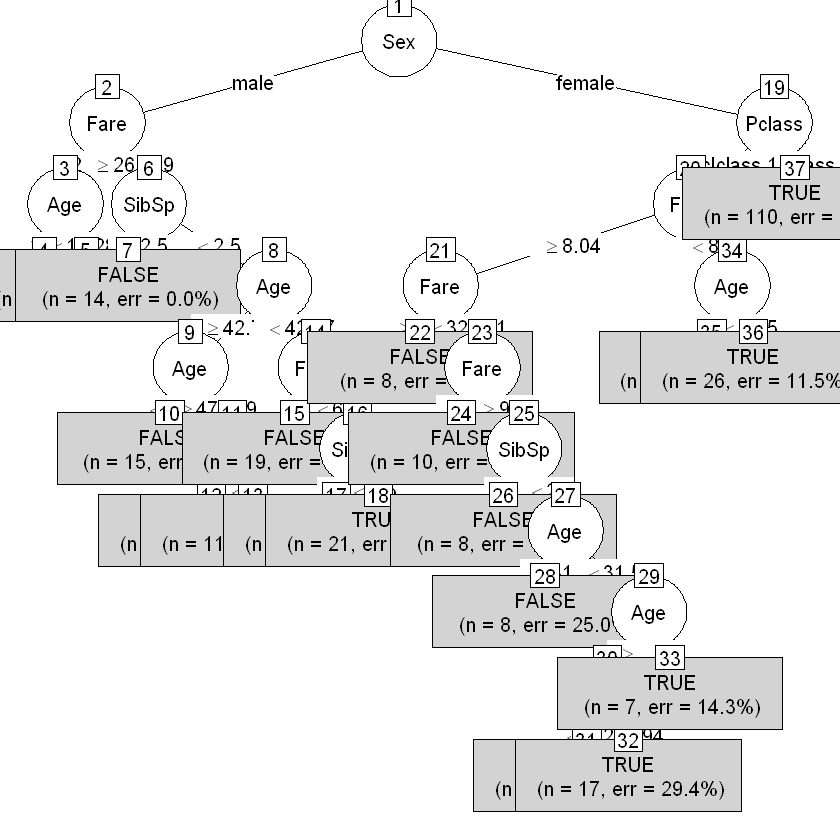

In [55]:
tree.disMin <- rpart(Survived ~ ., data = datappr, parms = list(split = "information"), cp = cpMin)
plot(as.party(tree.disMin), type="simple")

Nous obtenons exactement le même arbre que précédent. Ce qui veut dire que pour notre jeu de données l'arbre obtenu plus haut correspondait à l'arbre optimal. 
Nous devons maintenant tester cet arbre sur notre jeu de données test pour une validation.

Vérifions notre modèle par une prédiction avec notre échantillon test

In [56]:
pred.treeqMin <- predict(tree.disMin, newdata = datestd, type = "class") 

In [57]:
t=table(pred.treeqMin, datestd[, "Survived"])
print(t)
print("Taux de bien classés:")
Taux_B_Class=1-(t[1,2]+t[2,1])/sum(t)
print(Taux_B_Class*100)
Taux_v_positif=t[2,2]/(t[2,1]+t[2,2])*100
print("Taux de Vrai Positfs")
print(Taux_v_positif)
Taux_Faux_positif=t[2,1]/(t[2,1]+t[1,1])*100
print("Taux de Faux Positfs")
print(Taux_Faux_positif)

             
pred.treeqMin FALSE TRUE
        FALSE   143   28
        TRUE     17   79
[1] "Taux de bien classés:"
[1] 83.14607
[1] "Taux de Vrai Positfs"
[1] 82.29167
[1] "Taux de Faux Positfs"
[1] 10.625


### Commentaire:
Nous obtenons un taux de 87% . Ce résultat est très bon, même si la même remarque persiste propos au fait que nous trouvons plus facilement les personnes qui meurent. Le résultat est aussi nettement meilleur que celui obtenu avec la régression logistique sans interaction et celui de la régression logistique avec interactions. 

Même si ce résultat est très bon, nous cherchons à l'améliorer grâce à l'agrégation de modèles.

## Aggrégation de modèles

In [58]:
rf.dis.naImp <- randomForest(Survived ~ ., data = datappr, 
                       xtest = datestd[,-1], ytest = datestd[, "Survived"],
                       ntree = 10000, do.trace = 1000,mtry=4,importance = TRUE)

ntree      OOB      1      2|    Test      1      2
 1000:  15.43% 10.03% 24.46%|  17.60% 12.50% 25.23%
 2000:  15.76% 10.03% 25.32%|  17.60% 11.88% 26.17%
 3000:  15.76% 10.03% 25.32%|  17.60% 11.88% 26.17%
 4000:  15.76% 10.03% 25.32%|  17.60% 11.88% 26.17%
 5000:  15.43%  9.77% 24.89%|  17.60% 11.88% 26.17%
 6000:  15.92% 10.03% 25.75%|  17.60% 11.88% 26.17%
 7000:  15.76% 10.03% 25.32%|  17.60% 11.88% 26.17%
 8000:  15.92% 10.03% 25.75%|  17.60% 11.88% 26.17%
 9000:  15.76%  9.77% 25.75%|  17.60% 11.88% 26.17%
10000:  15.76%  9.77% 25.75%|  17.60% 11.25% 27.10%


In [59]:
# taux de bien classés de randomForest, à partir du jeu de données imputés
pred.rfqImp <- rf.dis.naImp$test$predicted
print(mean(pred.rfqImp == datestd[, "Survived"])*100)

[1] 82.397


In [60]:
t=table(rf.dis.naImp$test$predicted,datestd[, "Survived"])
print(t)
print("Taux de bien classés:")
Taux_B_Class=1-(t[1,2]+t[2,1])/sum(t)
print(Taux_B_Class*100)
Taux_v_positif=t[2,2]/(t[2,1]+t[2,2])*100
print("Taux de Vrai Positfs")
print(Taux_v_positif)
Taux_Faux_positif=t[2,1]/(t[2,1]+t[1,1])*100
print("Taux de Faux Positfs")
print(Taux_Faux_positif)

       
        FALSE TRUE
  FALSE   142   29
  TRUE     18   78
[1] "Taux de bien classés:"
[1] 82.397
[1] "Taux de Vrai Positfs"
[1] 81.25
[1] "Taux de Faux Positfs"
[1] 11.25


Pour l'agrégation de modèles avec mtry=4,  nous obtenons un taux de 89% qui est supérieur à ce que nous avons obtenu précédemment. Le résultat reste très bon. Il a plus de facilités à trouver les personnes qui survivent.

### Remarque: 
Nous avons essayer pour différentes valeurs de mtry, nous trouvons 4 comme valeur optimale.

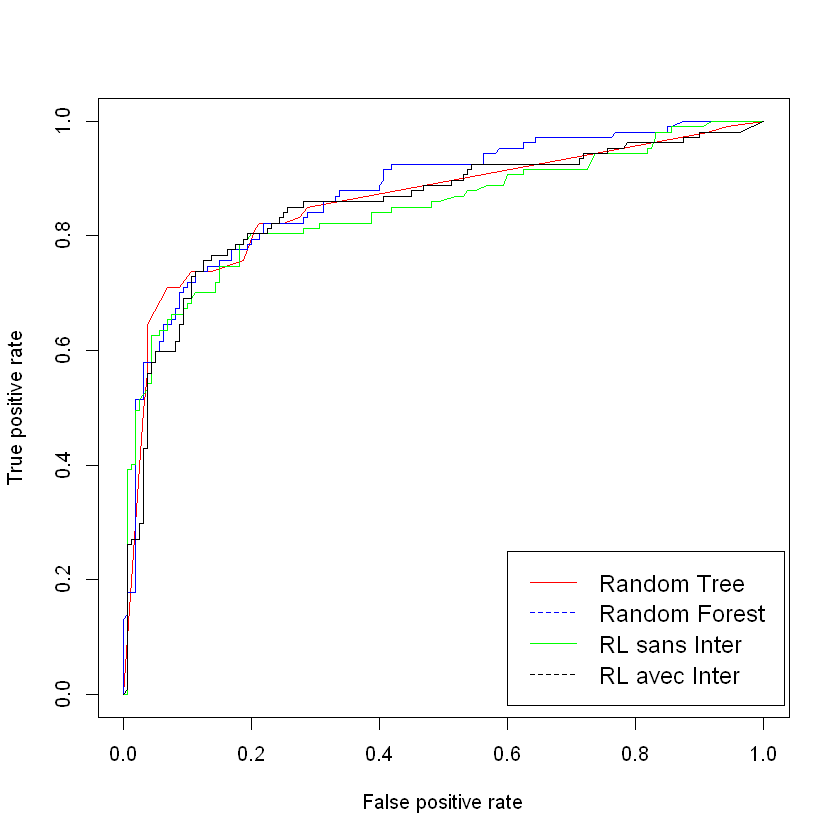

In [61]:
ROCdistree=predict(tree.dis,newdata=datestd,type="prob")[,2]
preddistree=prediction(ROCdistree,datestd$Survived)
perfdistree=performance(preddistree,"tpr","fpr")
plot(perfdistree,col="red")  

predrfr=prediction(rf.dis.naImp$test$votes[,2],datestd$Survived)
perfrfr=performance(predrfr,"tpr","fpr")
plot(perfrfr,col="blue",add=TRUE) 


roclogit=predict(log.lm.step,newdata=datestd,type="response")
predlogit=prediction(roclogit,datestd[,"Survived"])
perflogit=performance(predlogit, "tpr","fpr")
plot(perflogit,col="green",add=TRUE,label="RL sans Inter")

roclogit1=predict(log.lm.step1,newdata=datestd,type="response")
predlogit1=prediction(roclogit1,datestd[,"Survived"])
perflogit1=performance(predlogit1, "tpr","fpr")
plot(perflogit1,col="black",add=TRUE)

legend(0.6, 0.25, legend=c("Random Tree","Random Forest","RL sans Inter","RL avec Inter"),col=c("red", "blue","green","black"), lty=1:2, cex=1.2)

### Commentaire:
Ce graphe représente les courbes ROC pour chaque modèle utilisé dans notre analyse. 

Nous constatons que la courbe correspondant à la forêt aléatoire est plus haute que la courbe correspondant à la forêt aléatoire. Ce résultat est en adéquation avec ce que nous avons vu précédemment. En effet nous avions trouvé que ce modèle utilisant les arbres aléatoire avait plus de difficultés à trouver les personnes qui survivent que celui de la forêt aléatoire.
Il en est de même lorsque nous comparons le modèle utilisant la forêt aléatoire aux modèles de régression logistique. Ainsi, la forêt donne globalement un meilleur résultat. Néanmoins, il faut signaler que les courbes ROC pour la régression logistique et pour la forêt aléatoire sont très proches. 



### C.2.3 Importance des variables 

In [62]:
## Critère Gini
sort(round(importance(rf.dis.naImp), 2)[,4], decreasing=TRUE)

Sex      Age     Fare   Pclass    SibSp Embarked    Parch 
   81.04    69.35    67.05    26.75    14.81     9.11     8.36

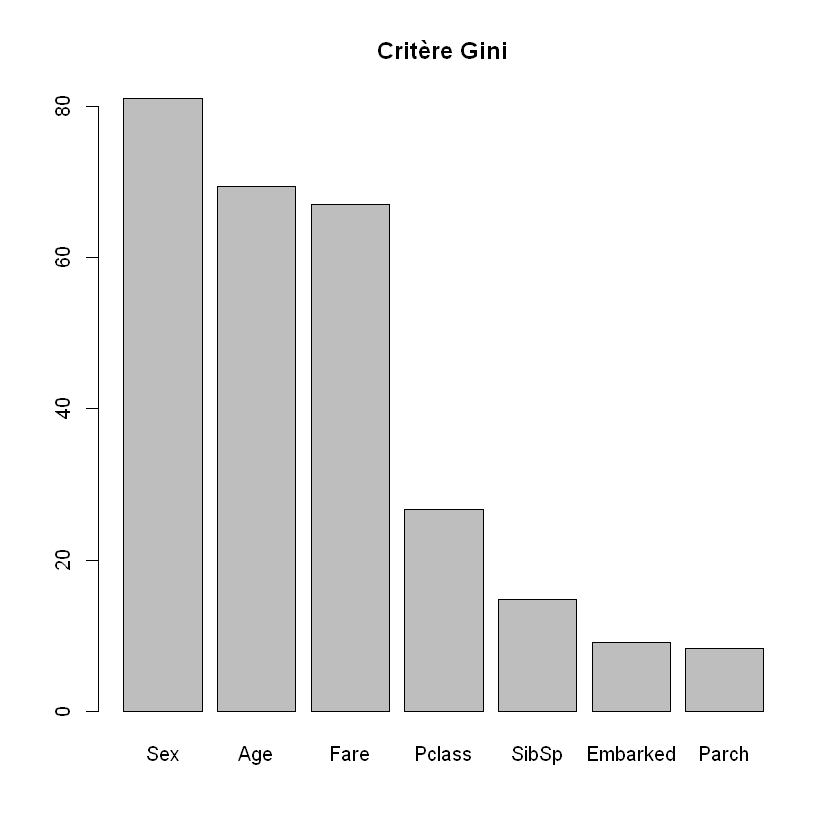

In [63]:
barplot(sort(round(importance(rf.dis.naImp), 2)[,4], decreasing=TRUE), main="Critère Gini")

In [64]:
## Critère Entropie
sort(round(importance(rf.dis.naImp), 2)[,3], decreasing=TRUE)

Sex      Age   Pclass     Fare    SibSp Embarked    Parch 
  426.13   200.16   198.89   178.98   111.83    62.32    40.90

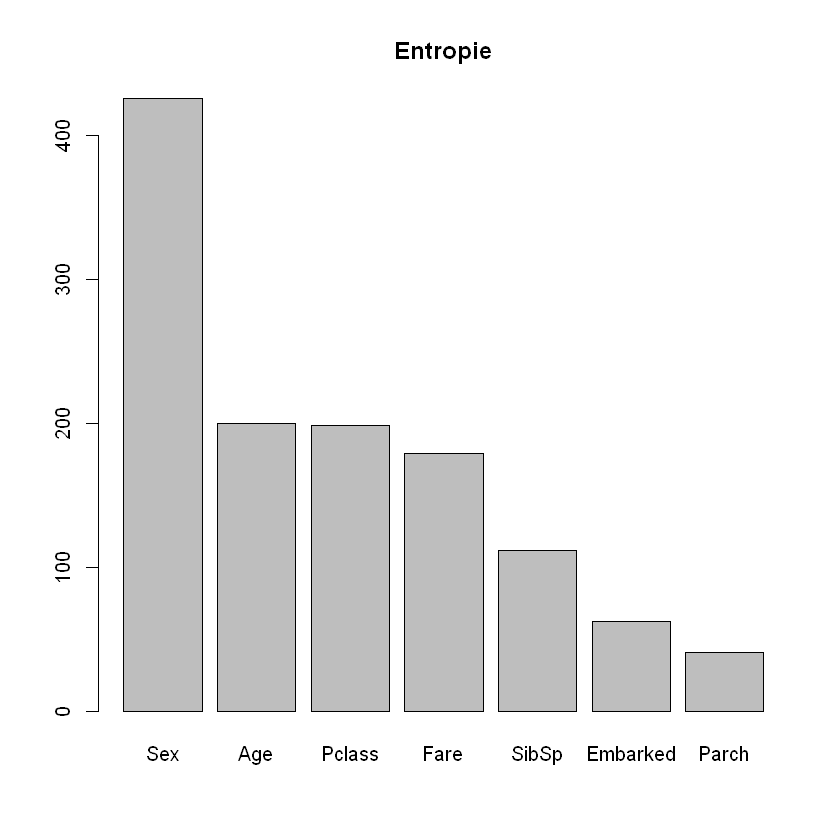

In [65]:
barplot(sort(round(importance(rf.dis.naImp), 2)[,3], decreasing=TRUE), main="Entropie")

### Commentaire: 
Pour le critère Gini,nous constatons que les variables Sex, Age et Fare sont les plus importantes. Ce résultat est en adéquation avec l'arbre obtenu sur lequel nous voyons que les variables Sex, Age et Fare ont une forte influence. 
Donc dans la partie B, le fait d'ignorer la variable Age affecte légérement le résultat de la classification. 
Ce qui permet de rendre compte de l'importance de l'imputation des données manquantes dans l'analyse des données, car ignorer une variable peut amener à fausser la modélisation de notre problème. 
Il en est de même pour l'Entropie.


## Conclusion de la partie C

Dans cette partie, au lieu d'ignorer la variable Age au vu des valeurs manquantes, nous avons réalisé une imputation grâce aux forêts aléatoire. Nous avons ainsi pu intégrer cette variable dans notre analyse et nous avons par conséquent vu qu'elle est trés importante dans la construction de notre modèle ( elle est la deuxième plus importante). Ainsi, nous obtenons des résultats nettement meilleurs que ceux obtenus dans la partie B.  
Nous pouvons aussi ajouter que dans cette analyse, les modèles obtenus grâce aux forêts aléatoires et à la régression logistique avec intéractions nous donnent de très bons résultats.

# D.Variable "Name"

In [66]:
Master=grepl('Master',TitData$Name)
Master=as.factor(Master)
summary(Master)

FALSE  TRUE 
  849    40

In [67]:
Tit_name=cbind(TitDataImputation,Master)
summary(Tit_name)

  Survived       Pclass        Sex           Age            SibSp       
 FALSE:549   class 1:214   female:312   Min.   : 0.42   Min.   :0.0000  
 TRUE :340   class 2:184   male  :577   1st Qu.:21.00   1st Qu.:0.0000  
             class 3:491                Median :28.78   Median :0.0000  
                                        Mean   :29.53   Mean   :0.5242  
                                        3rd Qu.:36.15   3rd Qu.:1.0000  
                                        Max.   :80.00   Max.   :8.0000  
     Parch             Fare         Embarked   Master   
 Min.   :0.0000   Min.   :  0.000    :  0    FALSE:849  
 1st Qu.:0.0000   1st Qu.:  7.896   C:168    TRUE : 40  
 Median :0.0000   Median : 14.454   Q: 77               
 Mean   :0.3825   Mean   : 32.097   S:644               
 3rd Qu.:0.0000   3rd Qu.: 31.000                       
 Max.   :6.0000   Max.   :512.329                       

In [68]:
# construction de l'échantillon d'apprentissage
datappr <- Tit_name[appri, ] 
# construction de l'échantillon test
datestd <- Tit_name[testi, ] 

## D.1 Regression logistique avec interaction

In [69]:
### Regression logistique avec interaction
log.lm1=glm(Survived~.^2,data=datappr,family=binomial)
anova(log.lm1,test="Chisq")
log.lm.step1=step(log.lm1,direction="backward")

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,621,822.7288,NA
Pclass,2,6.839632e+01,619,754.3325,1.405811e-15
Sex,1,1.929841e+02,618,561.3484,7.095702e-44
Age,1,1.693740e+01,617,544.4110,3.863286e-05
SibSp,1,1.096777e+01,616,533.4432,9.271007e-04
Parch,1,4.596331e-01,615,532.9836,4.977955e-01
Fare,1,6.802161e-01,614,532.3034,4.095123e-01
Embarked,2,9.443109e-01,612,531.3591,6.236566e-01
Master,1,2.955601e+01,611,501.8031,5.432403e-08


Start:  AIC=495.49
Survived ~ (Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Master)^2



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Step:  AIC=495.49
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Master + Pclass:Sex + Pclass:Age + Pclass:SibSp + Pclass:Parch + 
    Pclass:Fare + Pclass:Embarked + Pclass:Master + Sex:Age + 
    Sex:SibSp + Sex:Parch + Sex:Fare + Sex:Embarked + Age:SibSp + 
    Age:Parch + Age:Fare + Age:Embarked + Age:Master + SibSp:Parch + 
    SibSp:Fare + SibSp:Embarked + SibSp:Master + Parch:Fare + 
    Parch:Embarked + Parch:Master + Fare:Embarked + Fare:Master + 
    Embarked:Master



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                  Df Deviance    AIC
- Pclass:Embarked  4   390.31 488.31
- Embarked:Master  2   389.49 491.49
- Pclass:Master    2   389.49 491.49
- SibSp:Embarked   2   390.68 492.68
- Pclass:Parch     2   390.80 492.80
- Age:Master       1   389.49 493.49
- Fare:Master      1   389.49 493.49
- Parch:Master     1   389.49 493.49
- SibSp:Master     1   389.49 493.49
- Sex:SibSp        1   389.62 493.62
- Sex:Age          1   389.69 493.69
- Sex:Parch        1   389.74 493.74
- Age:SibSp        1   389.88 493.88
- Parch:Fare       1   389.93 493.93
- Sex:Fare         1   390.29 494.29
- Pclass:Age       2   392.55 494.55
- Age:Parch        1   391.10 495.10
<none>                 389.49 495.49
- SibSp:Fare       1   392.66 496.66
- SibSp:Parch      1   393.00 497.00
- Age:Fare         1   393.93 497.93
- Fare:Embarked    2   398.00 500.00
- Pclass:SibSp     2   398.05 500.05
- Parch:Embarked   2   399.03 501.03
- Sex:Embarked     2   400.33 502.33
- Age:Embarked     2   400.79 502.79
-

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=488.31
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Master + Pclass:Sex + Pclass:Age + Pclass:SibSp + Pclass:Parch + 
    Pclass:Fare + Pclass:Master + Sex:Age + Sex:SibSp + Sex:Parch + 
    Sex:Fare + Sex:Embarked + Age:SibSp + Age:Parch + Age:Fare + 
    Age:Embarked + Age:Master + SibSp:Parch + SibSp:Fare + SibSp:Embarked + 
    SibSp:Master + Parch:Fare + Parch:Embarked + Parch:Master + 
    Fare:Embarked + Fare:Master + Embarked:Master



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                  Df Deviance    AIC
- Embarked:Master  2   390.31 484.31
- Pclass:Master    2   390.31 484.31
- SibSp:Embarked   2   391.29 485.29
- Pclass:Parch     2   391.82 485.82
- SibSp:Master     1   390.31 486.31
- Age:Master       1   390.31 486.31
- Fare:Master      1   390.31 486.31
- Parch:Master     1   390.31 486.31
- Sex:SibSp        1   390.41 486.41
- Sex:Age          1   390.53 486.53
- Age:SibSp        1   390.68 486.68
- Sex:Parch        1   390.68 486.68
- Parch:Fare       1   391.02 487.02
- Sex:Fare         1   391.24 487.24
- Pclass:Age       2   393.49 487.49
- Age:Parch        1   391.98 487.98
<none>                 390.31 488.31
- SibSp:Fare       1   393.71 489.71
- SibSp:Parch      1   393.71 489.71
- Age:Fare         1   395.43 491.43
- Pclass:SibSp     2   398.75 492.75
- Fare:Embarked    2   399.90 493.90
- Pclass:Fare      2   401.60 495.60
- Pclass:Sex       2   401.86 495.86
- Parch:Embarked   2   402.57 496.57
- Sex:Embarked     2   403.05 497.05
-

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=484.31
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Master + Pclass:Sex + Pclass:Age + Pclass:SibSp + Pclass:Parch + 
    Pclass:Fare + Pclass:Master + Sex:Age + Sex:SibSp + Sex:Parch + 
    Sex:Fare + Sex:Embarked + Age:SibSp + Age:Parch + Age:Fare + 
    Age:Embarked + Age:Master + SibSp:Parch + SibSp:Fare + SibSp:Embarked + 
    SibSp:Master + Parch:Fare + Parch:Embarked + Parch:Master + 
    Fare:Embarked + Fare:Master



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- Pclass:Master   2   390.31 480.31
- SibSp:Embarked  2   391.29 481.29
- Pclass:Parch    2   391.82 481.82
- Parch:Master    1   390.31 482.31
- Age:Master      1   390.31 482.31
- Fare:Master     1   390.31 482.31
- SibSp:Master    1   390.31 482.31
- Sex:SibSp       1   390.41 482.41
- Sex:Age         1   390.53 482.53
- Age:SibSp       1   390.68 482.68
- Sex:Parch       1   390.68 482.68
- Parch:Fare      1   391.02 483.02
- Sex:Fare        1   391.24 483.24
- Pclass:Age      2   393.49 483.49
- Age:Parch       1   391.98 483.98
<none>                390.31 484.31
- SibSp:Fare      1   393.71 485.71
- SibSp:Parch     1   393.71 485.71
- Age:Fare        1   395.43 487.43
- Pclass:SibSp    2   398.75 488.75
- Fare:Embarked   2   399.90 489.90
- Pclass:Fare     2   401.60 491.60
- Pclass:Sex      2   401.86 491.86
- Parch:Embarked  2   402.57 492.57
- Sex:Embarked    2   403.05 493.05
- Age:Embarked    2   404.42 494.42


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=480.31
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Master + Pclass:Sex + Pclass:Age + Pclass:SibSp + Pclass:Parch + 
    Pclass:Fare + Sex:Age + Sex:SibSp + Sex:Parch + Sex:Fare + 
    Sex:Embarked + Age:SibSp + Age:Parch + Age:Fare + Age:Embarked + 
    Age:Master + SibSp:Parch + SibSp:Fare + SibSp:Embarked + 
    SibSp:Master + Parch:Fare + Parch:Embarked + Parch:Master + 
    Fare:Embarked + Fare:Master



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- SibSp:Embarked  2   391.29 477.29
- Pclass:Parch    2   391.82 477.82
- Parch:Master    1   390.31 478.31
- Fare:Master     1   390.31 478.31
- Age:Master      1   390.31 478.31
- Sex:SibSp       1   390.41 478.41
- Sex:Age         1   390.53 478.53
- Age:SibSp       1   390.68 478.68
- Sex:Parch       1   390.68 478.68
- Parch:Fare      1   391.02 479.02
- Sex:Fare        1   391.24 479.24
- Pclass:Age      2   393.49 479.49
- Age:Parch       1   391.98 479.98
<none>                390.31 480.31
- SibSp:Master    1   392.72 480.72
- SibSp:Fare      1   393.71 481.71
- SibSp:Parch     1   393.71 481.71
- Age:Fare        1   395.43 483.43
- Pclass:SibSp    2   398.75 484.75
- Fare:Embarked   2   399.90 485.90
- Pclass:Fare     2   401.60 487.60
- Pclass:Sex      2   401.86 487.86
- Parch:Embarked  2   402.57 488.57
- Sex:Embarked    2   403.05 489.05
- Age:Embarked    2   404.42 490.42


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=477.29
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Master + Pclass:Sex + Pclass:Age + Pclass:SibSp + Pclass:Parch + 
    Pclass:Fare + Sex:Age + Sex:SibSp + Sex:Parch + Sex:Fare + 
    Sex:Embarked + Age:SibSp + Age:Parch + Age:Fare + Age:Embarked + 
    Age:Master + SibSp:Parch + SibSp:Fare + SibSp:Master + Parch:Fare + 
    Parch:Embarked + Parch:Master + Fare:Embarked + Fare:Master



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- Pclass:Parch    2   392.81 474.81
- Parch:Master    1   391.29 475.29
- Age:Master      1   391.29 475.29
- Fare:Master     1   391.29 475.29
- Sex:SibSp       1   391.33 475.33
- Sex:Age         1   391.54 475.54
- Sex:Parch       1   391.60 475.60
- Age:SibSp       1   391.63 475.63
- Parch:Fare      1   391.90 475.90
- Pclass:Age      2   394.43 476.43
- Sex:Fare        1   392.57 476.57
- Age:Parch       1   392.94 476.94
<none>                391.29 477.29
- SibSp:Master    1   394.13 478.13
- SibSp:Parch     1   394.25 478.25
- SibSp:Fare      1   394.70 478.70
- Age:Fare        1   396.83 480.83
- Pclass:SibSp    2   399.83 481.83
- Pclass:Sex      2   402.94 484.94
- Pclass:Fare     2   403.14 485.14
- Parch:Embarked  2   403.81 485.81
- Sex:Embarked    2   404.58 486.58
- Fare:Embarked   2   413.40 495.40
- Age:Embarked    2   414.03 496.03


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=474.81
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Master + Pclass:Sex + Pclass:Age + Pclass:SibSp + Pclass:Fare + 
    Sex:Age + Sex:SibSp + Sex:Parch + Sex:Fare + Sex:Embarked + 
    Age:SibSp + Age:Parch + Age:Fare + Age:Embarked + Age:Master + 
    SibSp:Parch + SibSp:Fare + SibSp:Master + Parch:Fare + Parch:Embarked + 
    Parch:Master + Fare:Embarked + Fare:Master



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- Parch:Master    1   392.81 472.81
- Age:Master      1   392.81 472.81
- Fare:Master     1   392.81 472.81
- Sex:SibSp       1   392.83 472.83
- Sex:Age         1   392.93 472.93
- Parch:Fare      1   392.95 472.95
- Age:SibSp       1   393.11 473.11
- Sex:Parch       1   393.42 473.42
- Pclass:Age      2   395.78 473.78
- Sex:Fare        1   394.11 474.11
- Age:Parch       1   394.74 474.74
<none>                392.81 474.81
- SibSp:Master    1   395.88 475.88
- SibSp:Parch     1   395.93 475.93
- SibSp:Fare      1   396.05 476.05
- Age:Fare        1   398.10 478.10
- Pclass:SibSp    2   401.34 479.34
- Pclass:Fare     2   404.54 482.54
- Parch:Embarked  2   404.68 482.68
- Sex:Embarked    2   405.73 483.73
- Pclass:Sex      2   407.91 485.91
- Fare:Embarked   2   415.49 493.49
- Age:Embarked    2   415.99 493.99


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=472.81
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Master + Pclass:Sex + Pclass:Age + Pclass:SibSp + Pclass:Fare + 
    Sex:Age + Sex:SibSp + Sex:Parch + Sex:Fare + Sex:Embarked + 
    Age:SibSp + Age:Parch + Age:Fare + Age:Embarked + Age:Master + 
    SibSp:Parch + SibSp:Fare + SibSp:Master + Parch:Fare + Parch:Embarked + 
    Fare:Embarked + Fare:Master



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- Age:Master      1   392.81 470.81
- Fare:Master     1   392.81 470.81
- Sex:SibSp       1   392.83 470.83
- Sex:Age         1   392.93 470.93
- Parch:Fare      1   392.95 470.95
- Age:SibSp       1   393.11 471.11
- Sex:Parch       1   393.42 471.42
- Pclass:Age      2   395.78 471.78
- Sex:Fare        1   394.11 472.11
- Age:Parch       1   394.74 472.74
<none>                392.81 472.81
- SibSp:Parch     1   395.93 473.93
- SibSp:Fare      1   396.05 474.05
- SibSp:Master    1   396.74 474.74
- Age:Fare        1   398.10 476.10
- Pclass:SibSp    2   401.34 477.34
- Pclass:Fare     2   404.54 480.54
- Parch:Embarked  2   404.68 480.68
- Sex:Embarked    2   405.73 481.73
- Pclass:Sex      2   407.91 483.91
- Fare:Embarked   2   415.49 491.49
- Age:Embarked    2   415.99 491.99


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=470.81
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Master + Pclass:Sex + Pclass:Age + Pclass:SibSp + Pclass:Fare + 
    Sex:Age + Sex:SibSp + Sex:Parch + Sex:Fare + Sex:Embarked + 
    Age:SibSp + Age:Parch + Age:Fare + Age:Embarked + SibSp:Parch + 
    SibSp:Fare + SibSp:Master + Parch:Fare + Parch:Embarked + 
    Fare:Embarked + Fare:Master



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- Fare:Master     1   392.81 468.81
- Sex:SibSp       1   392.83 468.83
- Sex:Age         1   392.93 468.93
- Parch:Fare      1   392.95 468.95
- Age:SibSp       1   393.11 469.11
- Sex:Parch       1   393.42 469.42
- Pclass:Age      2   395.78 469.78
- Sex:Fare        1   394.11 470.11
- Age:Parch       1   394.74 470.74
<none>                392.81 470.81
- SibSp:Parch     1   395.93 471.93
- SibSp:Fare      1   396.05 472.05
- SibSp:Master    1   396.78 472.78
- Age:Fare        1   398.10 474.10
- Pclass:SibSp    2   401.34 475.34
- Pclass:Fare     2   404.54 478.54
- Parch:Embarked  2   404.68 478.68
- Sex:Embarked    2   405.73 479.73
- Pclass:Sex      2   407.91 481.91
- Fare:Embarked   2   415.49 489.49
- Age:Embarked    2   415.99 489.99


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=468.81
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Master + Pclass:Sex + Pclass:Age + Pclass:SibSp + Pclass:Fare + 
    Sex:Age + Sex:SibSp + Sex:Parch + Sex:Fare + Sex:Embarked + 
    Age:SibSp + Age:Parch + Age:Fare + Age:Embarked + SibSp:Parch + 
    SibSp:Fare + SibSp:Master + Parch:Fare + Parch:Embarked + 
    Fare:Embarked



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- Sex:SibSp       1   392.83 466.83
- Sex:Age         1   392.93 466.93
- Parch:Fare      1   392.95 466.95
- Age:SibSp       1   393.11 467.11
- Sex:Parch       1   393.42 467.42
- Pclass:Age      2   395.78 467.78
- Sex:Fare        1   394.11 468.11
- Age:Parch       1   394.74 468.74
<none>                392.81 468.81
- SibSp:Parch     1   395.93 469.93
- SibSp:Fare      1   396.05 470.05
- SibSp:Master    1   397.11 471.11
- Age:Fare        1   398.10 472.10
- Pclass:SibSp    2   401.34 473.34
- Pclass:Fare     2   404.54 476.54
- Parch:Embarked  2   404.68 476.68
- Sex:Embarked    2   405.73 477.73
- Pclass:Sex      2   407.91 479.91
- Fare:Embarked   2   415.49 487.49
- Age:Embarked    2   415.99 487.99


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=466.83
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Master + Pclass:Sex + Pclass:Age + Pclass:SibSp + Pclass:Fare + 
    Sex:Age + Sex:Parch + Sex:Fare + Sex:Embarked + Age:SibSp + 
    Age:Parch + Age:Fare + Age:Embarked + SibSp:Parch + SibSp:Fare + 
    SibSp:Master + Parch:Fare + Parch:Embarked + Fare:Embarked



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- Sex:Age         1   392.96 464.96
- Parch:Fare      1   392.99 464.99
- Age:SibSp       1   393.11 465.11
- Sex:Parch       1   393.59 465.59
- Pclass:Age      2   395.80 465.80
- Sex:Fare        1   394.18 466.18
- Age:Parch       1   394.74 466.74
<none>                392.83 466.83
- SibSp:Fare      1   396.05 468.05
- SibSp:Parch     1   396.45 468.45
- Age:Fare        1   398.10 470.10
- Pclass:SibSp    2   401.67 471.67
- SibSp:Master    1   401.30 473.30
- Pclass:Fare     2   404.60 474.60
- Parch:Embarked  2   404.72 474.72
- Sex:Embarked    2   405.75 475.75
- Pclass:Sex      2   408.45 478.45
- Fare:Embarked   2   415.56 485.56
- Age:Embarked    2   416.24 486.24


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=464.96
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Master + Pclass:Sex + Pclass:Age + Pclass:SibSp + Pclass:Fare + 
    Sex:Parch + Sex:Fare + Sex:Embarked + Age:SibSp + Age:Parch + 
    Age:Fare + Age:Embarked + SibSp:Parch + SibSp:Fare + SibSp:Master + 
    Parch:Fare + Parch:Embarked + Fare:Embarked



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- Parch:Fare      1   393.12 463.12
- Age:SibSp       1   393.19 463.19
- Sex:Parch       1   393.66 463.66
- Pclass:Age      2   395.83 463.83
- Sex:Fare        1   394.63 464.63
<none>                392.96 464.96
- Age:Parch       1   395.67 465.67
- SibSp:Fare      1   396.34 466.34
- SibSp:Parch     1   396.53 466.53
- Age:Fare        1   398.25 468.25
- Pclass:SibSp    2   402.27 470.27
- SibSp:Master    1   401.64 471.64
- Pclass:Fare     2   404.68 472.68
- Parch:Embarked  2   404.75 472.75
- Sex:Embarked    2   405.85 473.85
- Pclass:Sex      2   408.76 476.76
- Fare:Embarked   2   415.72 483.72
- Age:Embarked    2   416.43 484.43


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=463.12
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Master + Pclass:Sex + Pclass:Age + Pclass:SibSp + Pclass:Fare + 
    Sex:Parch + Sex:Fare + Sex:Embarked + Age:SibSp + Age:Parch + 
    Age:Fare + Age:Embarked + SibSp:Parch + SibSp:Fare + SibSp:Master + 
    Parch:Embarked + Fare:Embarked



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- Age:SibSp       1   393.31 461.31
- Sex:Parch       1   393.67 461.67
- Pclass:Age      2   395.90 461.90
- Sex:Fare        1   394.83 462.83
<none>                393.12 463.12
- Age:Parch       1   395.68 463.68
- SibSp:Fare      1   396.37 464.37
- SibSp:Parch     1   396.67 464.67
- Age:Fare        1   398.25 466.25
- Pclass:SibSp    2   402.30 468.30
- SibSp:Master    1   402.35 470.35
- Pclass:Fare     2   404.71 470.71
- Parch:Embarked  2   405.04 471.04
- Sex:Embarked    2   406.04 472.04
- Pclass:Sex      2   408.84 474.84
- Fare:Embarked   2   416.24 482.24
- Age:Embarked    2   416.74 482.74


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=461.31
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Master + Pclass:Sex + Pclass:Age + Pclass:SibSp + Pclass:Fare + 
    Sex:Parch + Sex:Fare + Sex:Embarked + Age:Parch + Age:Fare + 
    Age:Embarked + SibSp:Parch + SibSp:Fare + SibSp:Master + 
    Parch:Embarked + Fare:Embarked



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- Sex:Parch       1   393.80 459.80
- Pclass:Age      2   396.19 460.19
- Sex:Fare        1   395.10 461.10
<none>                393.31 461.31
- Age:Parch       1   395.68 461.68
- SibSp:Fare      1   396.67 462.67
- SibSp:Parch     1   396.68 462.68
- Age:Fare        1   398.98 464.98
- SibSp:Master    1   403.04 469.04
- Pclass:Fare     2   405.21 469.21
- Parch:Embarked  2   405.35 469.35
- Sex:Embarked    2   406.32 470.32
- Pclass:SibSp    2   407.42 471.42
- Pclass:Sex      2   408.84 472.84
- Fare:Embarked   2   416.91 480.91
- Age:Embarked    2   417.34 481.34


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=459.8
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Master + Pclass:Sex + Pclass:Age + Pclass:SibSp + Pclass:Fare + 
    Sex:Fare + Sex:Embarked + Age:Parch + Age:Fare + Age:Embarked + 
    SibSp:Parch + SibSp:Fare + SibSp:Master + Parch:Embarked + 
    Fare:Embarked



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- Pclass:Age      2   396.99 458.99
<none>                393.80 459.80
- Sex:Fare        1   396.33 460.33
- Age:Parch       1   396.90 460.90
- SibSp:Parch     1   397.23 461.23
- SibSp:Fare      1   397.28 461.28
- Age:Fare        1   399.96 463.96
- Parch:Embarked  2   405.49 467.49
- SibSp:Master    1   404.14 468.14
- Sex:Embarked    2   406.63 468.63
- Pclass:Fare     2   406.90 468.90
- Pclass:SibSp    2   408.37 470.37
- Pclass:Sex      2   409.09 471.09
- Fare:Embarked   2   417.77 479.77
- Age:Embarked    2   418.11 480.11


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=458.99
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Master + Pclass:Sex + Pclass:SibSp + Pclass:Fare + Sex:Fare + 
    Sex:Embarked + Age:Parch + Age:Fare + Age:Embarked + SibSp:Parch + 
    SibSp:Fare + SibSp:Master + Parch:Embarked + Fare:Embarked



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance    AIC
- Sex:Fare        1   398.53 458.53
<none>                396.99 458.99
- Age:Parch       1   399.05 459.05
- SibSp:Parch     1   400.28 460.28
- SibSp:Fare      1   400.57 460.57
- Age:Fare        1   401.05 461.05
- SibSp:Master    1   406.26 466.26
- Parch:Embarked  2   408.69 466.69
- Pclass:Fare     2   408.76 466.76
- Sex:Embarked    2   409.77 467.77
- Pclass:Sex      2   412.16 470.16
- Pclass:SibSp    2   413.50 471.50
- Fare:Embarked   2   420.51 478.51
- Age:Embarked    2   421.23 479.23


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=458.53
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Master + Pclass:Sex + Pclass:SibSp + Pclass:Fare + Sex:Embarked + 
    Age:Parch + Age:Fare + Age:Embarked + SibSp:Parch + SibSp:Fare + 
    SibSp:Master + Parch:Embarked + Fare:Embarked



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                 Df Deviance    AIC
- Age:Parch       1   400.30 458.30
<none>                398.53 458.53
- SibSp:Fare      1   401.06 459.06
- SibSp:Parch     1   401.53 459.53
- Age:Fare        1   401.65 459.65
- Pclass:Fare     2   409.54 465.54
- Parch:Embarked  2   410.07 466.07
- SibSp:Master    1   408.25 466.25
- Sex:Embarked    2   411.05 467.05
- Pclass:SibSp    2   413.75 469.75
- Pclass:Sex      2   418.58 474.58
- Fare:Embarked   2   421.48 477.48
- Age:Embarked    2   422.02 478.02


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=458.3
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + 
    Master + Pclass:Sex + Pclass:SibSp + Pclass:Fare + Sex:Embarked + 
    Age:Fare + Age:Embarked + SibSp:Parch + SibSp:Fare + SibSp:Master + 
    Parch:Embarked + Fare:Embarked



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                 Df Deviance    AIC
<none>                400.30 458.30
- Age:Fare        1   402.66 458.66
- SibSp:Fare      1   402.99 458.99
- SibSp:Parch     1   403.74 459.74
- Pclass:Fare     2   411.36 465.36
- Parch:Embarked  2   412.62 466.62
- SibSp:Master    1   410.68 466.68
- Sex:Embarked    2   412.70 466.70
- Pclass:SibSp    2   415.08 469.08
- Pclass:Sex      2   420.71 474.71
- Fare:Embarked   2   422.66 476.66
- Age:Embarked    2   423.04 477.04


In [70]:
summary(log.lm.step1)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Parch + 
    Fare + Embarked + Master + Pclass:Sex + Pclass:SibSp + Pclass:Fare + 
    Sex:Embarked + Age:Fare + Age:Embarked + SibSp:Parch + SibSp:Fare + 
    SibSp:Master + Parch:Embarked + Fare:Embarked, family = binomial, 
    data = datappr)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6871  -0.4954  -0.3082   0.2383   2.5178  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            6.494e+00  1.512e+00   4.294 1.76e-05 ***
Pclassclass 2         -7.986e-01  1.467e+00  -0.544 0.586226    
Pclassclass 3         -4.698e+00  1.178e+00  -3.988 6.66e-05 ***
Sexmale               -4.157e+00  1.020e+00  -4.074 4.61e-05 ***
Age                   -9.178e-02  3.268e-02  -2.809 0.004972 ** 
SibSp                  1.979e+00  8.028e-01   2.466 0.013679 *  
Parch                 -2.530e-02  4.280e-01  -0.059 0.952864    
Fare                  -1.637e-02  1.216e-02

On voit que la probabilité de survie d'une personne "Master" est très élevé que celle qui n'est pas "Master"

In [71]:
pred.log=predict(log.lm.step1,newdata=datestd,type="response")

In [72]:
t <- table(pred.log>0.5,datestd[,"Survived"])
print(t)
print("Taux de bien classés:")
Taux_B_Class=1-(t[1,2]+t[2,1])/sum(t)
print(Taux_B_Class*100)

       
        FALSE TRUE
  FALSE   140   30
  TRUE     20   77
[1] "Taux de bien classés:"
[1] 81.27341


## D.2 Arbre binire

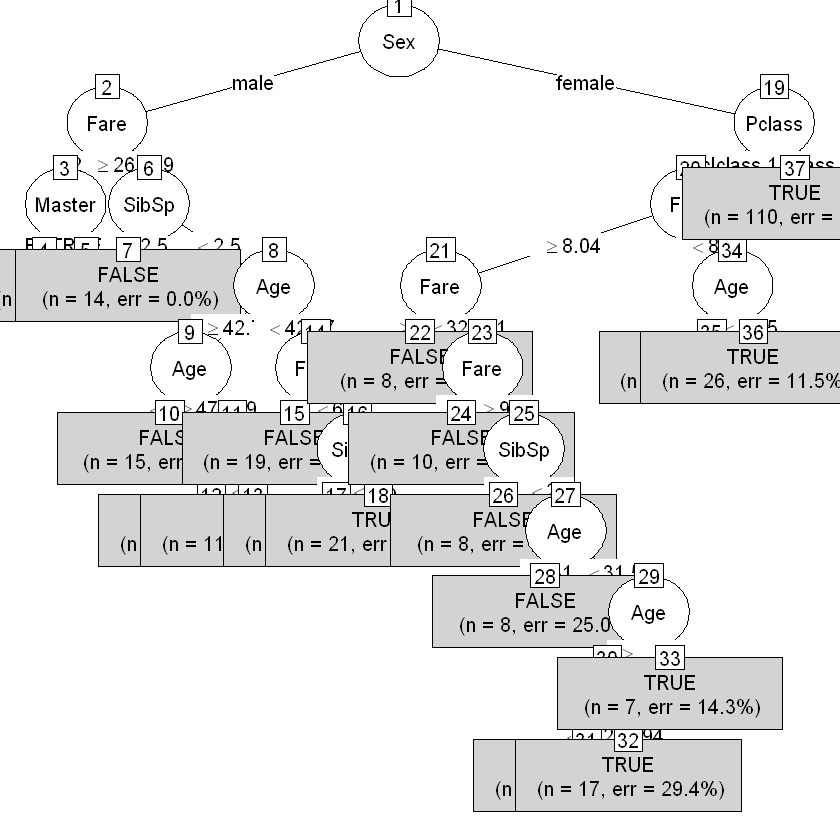

In [73]:
tree.dis <- rpart(Survived ~ ., data = datappr, parms = list(split = "information"), cp = 0.001)
plot(as.party(tree.dis), type="simple")

In [74]:
xmat <- xpred.rpart(tree.dis)
# Comparaison des valeurs prédite et observée
xerr <- datappr$Survived != (xmat > 1.5) 
# Calcul  des estimations des taux d'erreur
CVerr <- apply(xerr, 2, sum) / nrow(xerr)
CVerr

0.721030043 0.126990769 0.025025545 0.014017109 0.011081497 0.009596858 
  0.3745981   0.2090032   0.2057878   0.2025723   0.1993569   0.1993569 
0.007835802 0.006786004 0.002537276 
  0.1864952   0.1832797   0.1864952

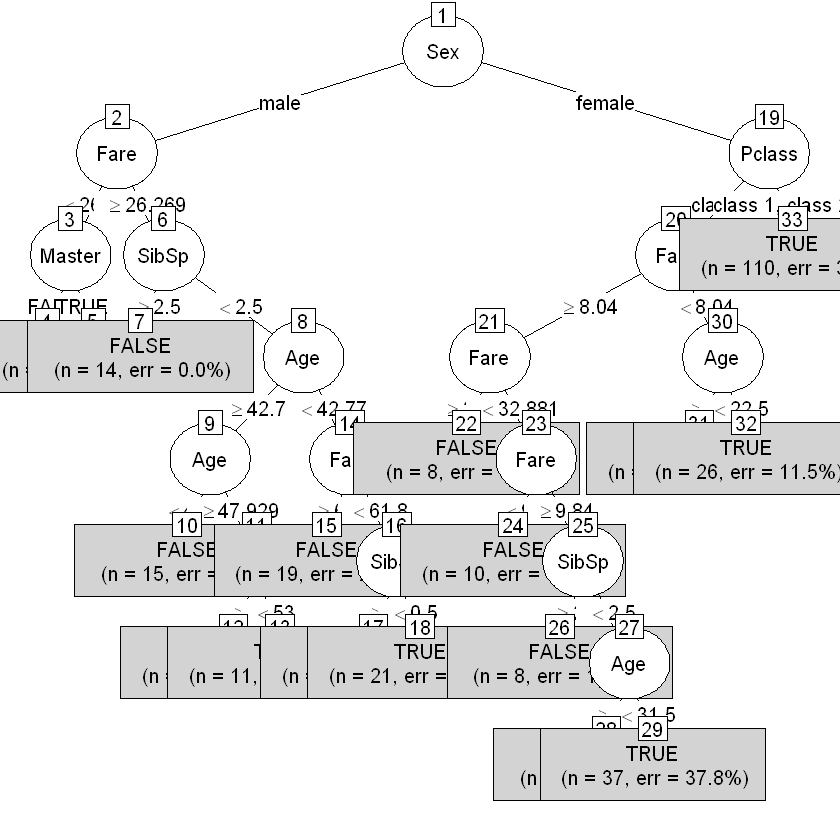

In [75]:
cpMin <- as.numeric(attributes(which.min(CVerr))$names)
tree.disMin <- rpart(Survived ~ ., data = datappr, parms = list(split = "information"), cp = cpMin)
plot(as.party(tree.disMin), type="simple")

In [76]:
pred.treeqMin <- predict(tree.disMin, newdata = datestd, type = "class") 
t=table(pred.treeqMin, datestd[, "Survived"])
print(t)
print("Taux de bien classés:")
Taux_B_Class=1-(t[1,2]+t[2,1])/sum(t)
print(Taux_B_Class*100)

             
pred.treeqMin FALSE TRUE
        FALSE   141   28
        TRUE     19   79
[1] "Taux de bien classés:"
[1] 82.397


## D.3 Forêt aléatoire

In [77]:
rf.dis.naImp <- randomForest(Survived ~ ., data = datappr, 
                       xtest = datestd[,-1], ytest = datestd[, "Survived"],
                       ntree = 10000, do.trace = 1000,mtry=4,importance = TRUE)

ntree      OOB      1      2|    Test      1      2
 1000:  15.27%  9.25% 25.32%|  16.85% 10.62% 26.17%
 2000:  15.11%  9.00% 25.32%|  16.85% 10.62% 26.17%
 3000:  15.27%  9.00% 25.75%|  17.23% 11.25% 26.17%
 4000:  15.27%  9.00% 25.75%|  17.60% 11.88% 26.17%
 5000:  15.11%  9.00% 25.32%|  17.23% 11.25% 26.17%
 6000:  15.27%  9.00% 25.75%|  17.23% 11.25% 26.17%
 7000:  15.11%  9.00% 25.32%|  17.23% 11.25% 26.17%
 8000:  15.27%  9.00% 25.75%|  17.23% 11.25% 26.17%
 9000:  15.27%  9.00% 25.75%|  17.60% 11.88% 26.17%
10000:  15.27%  9.00% 25.75%|  17.60% 11.88% 26.17%


In [78]:
pred.rfqImp <- rf.dis.naImp$test$predicted
print(mean(pred.rfqImp == datestd[, "Survived"])*100)

[1] 82.397


In [79]:
table(rf.dis.naImp$test$predicted,datestd[, "Survived"])

       
        FALSE TRUE
  FALSE   141   28
  TRUE     19   79

#### Importance des variables( Critère Entropie)

In [80]:
sort(round(importance(rf.dis.naImp), 2)[,3], decreasing=TRUE)

Sex   Pclass     Fare      Age    SibSp   Master Embarked    Parch 
  424.33   190.67   176.14   158.91   116.16    88.56    63.45    30.22

On voit qu'il y a un amélioration sur la performance de nos modèles(surtout pour les modèles régression logistiques) quand on ajoute la nouvelle variable("Name)